In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time


import sys
sys.path.insert(1, '../../Files')

import logo
from constants import Units, Constants
from SNdistribution import SNdistribution

import pandas as pd

import plotly.graph_objects as go

In [2]:
%load_ext autoreload
%autoreload 2

Check if everything is ok

In [3]:
logo.logo()


      ____  _   _   _____          _                 _\/_
     / ___|| \ | | |  ___|_ _  ___| |_ ___  _ __ _   _/\ 
     \___ \|  \| | | |_ / _` |/ __| __/ _ \| '__| | | |
      ___) | |\  | |  _| (_| | (__| || (_) | |  | |_| |
     |____/|_| \_| |_|  \__,_|\___|\__\___/|_|   \__, |
                                                 |___/ 
                                            
                Baking particles since 1987!
                         v.beta.1
    


# SET UP

In [4]:
SNdist = SNdistribution(SNrate=1.63, 
                        Rd=2.6, 
                        H=0.3, 
                        RE=8.23, 
                        zE=0.0208)

### Simulate the SN history (r, theta, z, t)

##### Estimate the SN relevant time window

In [5]:
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print('max time (SN at r=-30 kpc, and very slow ALPs: Ea~ma):')
print( 't = %.6e' % SNdist.tarrival(0.01*(1 + 0.01), 0.01, -30, 0, 0) , 's' ) # inputs: (Ea, ma, r, theta, z)
print( 't = %.6e' % SNdist.tarrival(1*(1 + 0.01), 1, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(10*(1 + 0.01), 10, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(100*(1 + 0.01), 100, -30, 0, 0) , 's' )

RE=8.23
zE=0.0208
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.1, 0, zE) , 's' )

max time (SN at r=-30 kpc, and very slow ALPs: Ea~ma):
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s

min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)
t = 1.029379e+10 s
t = 1.029402e+10 s
t = 1.031674e+10 s
t = 1.381057e+10 s


In [6]:
RE=8.23
zE=0.0208
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.00, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.00, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.00, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.00, 0, zE) , 's' )


min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)
t = 0.000000e+00 s
t = 0.000000e+00 s
t = 0.000000e+00 s
t = 0.000000e+00 s


## Simulate

In [7]:
# number of universes:
num_ITER = 20
# num_ITER = 100

SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = -1e10)
# SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = 0)


# show the number of SN per universe
iteration = np.arange(1, num_ITER + 1)

print(" Universe |  # of SNe")
for i, count in zip(iteration, SN_numbers):
    print(f"{i:>9} | {count:>8}")

 Universe |  # of SNe
        1 |    14366
        2 |    14349
        3 |    14344
        4 |    14466
        5 |    14475
        6 |    14357
        7 |    14411
        8 |    14555
        9 |    14443
       10 |    14321
       11 |    14297
       12 |    14494
       13 |    14620
       14 |    14541
       15 |    14503
       16 |    14552
       17 |    14223
       18 |    14489
       19 |    14285
       20 |    14460


In [8]:
# Create DataFrame with a single simulation
df = pd.DataFrame(SN_sim[2], columns=['r [kpc]', '$\theta$', 'z [kpc]', 't [s]'])

# Show the first 10 rows
df.head(10)

,r [kpc],$\theta$,z [kpc],t [s]
0,3.633596,4.739676,-0.379220,-2.799916e+13
1,0.202749,0.202460,0.079171,-2.799898e+13
2,1.251226,5.475244,-0.320001,-2.799847e+13
3,1.684112,2.802380,-0.001709,-2.799619e+13
4,5.361244,4.173745,0.447933,-2.799555e+13
5,2.562183,1.889712,-0.326796,-2.799503e+13
6,2.177280,0.077653,0.087030,-2.799428e+13
7,1.914182,5.419587,0.137702,-2.799352e+13
8,8.099642,3.558192,0.138277,-2.799329e+13
9,3.172521,1.907403,-0.527523,-2.799244e+13


#### Plot the SN in galactic coordinates

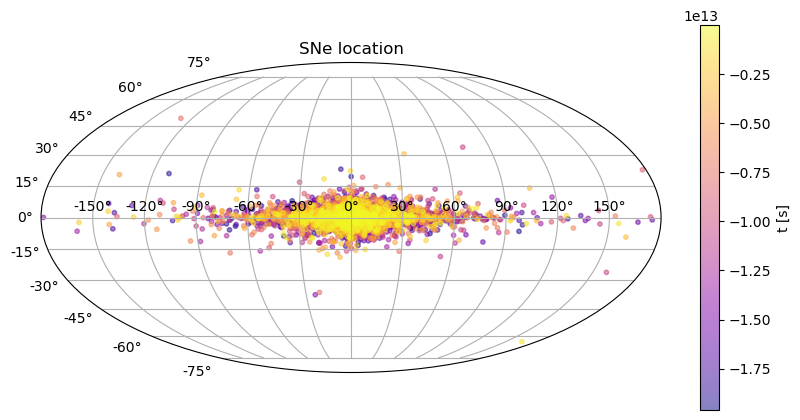

In [9]:
solar_system_position = [8.3, 0, 0]  # Solar System position, in kpc

# number off SN to plot
num_sn_examples = 10000

# take SN positions from df (r, theta, z) 'r [kpc]', '$\theta$', 'z [kpc]', 't [s]'
r = df['r [kpc]'].values[-num_sn_examples:]
theta = df['$\theta$'].values[-num_sn_examples:]
z = df['z [kpc]'].values[-num_sn_examples:]

# Catesian
x = r * np.cos(theta)
y = r * np.sin(theta)

# Center in the Sun
x_helio = x - (solar_system_position[0] * np.cos(solar_system_position[1]) )
y_helio = y - (solar_system_position[0] * np.sin(solar_system_position[1]) )
z_helio = z - solar_system_position[2]

# now the GC is in (x_helio, y_helio) = (-r_sun, 0)
# I want it in (r_sun, 0)

# Mirror
x_new = -x_helio
y_new = y_helio
z_new = z_helio

# Galactic coordinates
l = np.arctan2(y_new, x_new)      # longitude [-pi, pi]
b = np.arctan2(z_new, np.sqrt(x_new**2 + y_new**2))  # latitude



# Plot in Mollweide projection (galactic coordinates)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
sc = ax.scatter(l, b, s=10, c=df['t [s]'][-num_sn_examples:], cmap='plasma', alpha=0.5)


# Colorbar for SN times
cbar = plt.colorbar(sc, orientation="vertical", pad=0.05)
cbar.set_label("t [s]")

ax.set_title("SNe location")
ax.grid(True)
plt.savefig("figures/SNlocation.pdf", bbox_inches='tight')
plt.show()

## Diffuse approximation

In [10]:
# FLUX

diffSNfactor = SNdist.flux_factor()
print("diffuse galactic SN flux factor: ", diffSNfactor, " [cm^{-2} s^{-1}]")

diffuse galactic SN flux factor:  1.3955222568980171e-55  [cm^{-2} s^{-1}]


In [11]:
# FLUENCE

ExpTIME = 20 * Units.seconds_in_year  # Time window of the experiment, in seconds

fluence_diff = diffSNfactor * ExpTIME # [cm^{-2}]
print(f'Diffuse fluence factor (for 20 yr exposure): {fluence_diff:.3e} cm^-2')

Diffuse fluence factor (for 20 yr exposure): 8.802e-47 cm^-2


#### Compute the ALP flux from EACH SN in 1 simulation

In [12]:
# Example for 1 iteration

iit = 0 # choose a specific interaction
maTEST = 30 # MeV



# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[iit])



# Create DataFrame with a single simulation
Erange_df = pd.DataFrame(Erange, columns=['E1 [MeV]', 'E2 [MeV]', 'd(SN-Earth) [kpc]'])

# Show the first and the last 5 rows
pd.concat([Erange_df.head(5), Erange_df.tail(5)])

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


,E1 [MeV],E2 [MeV],d(SN-Earth) [kpc]
0,30.009724,30.009725,6.924251
1,30.016850,30.016851,9.111799
2,30.014410,30.014411,8.426272
3,30.010482,30.010482,7.186689
4,30.028976,30.028977,11.940593
14361,NaN,NaN,9.002593
14362,NaN,NaN,11.658623
14363,NaN,NaN,7.463817
14364,NaN,NaN,11.072778
14365,NaN,NaN,7.769522


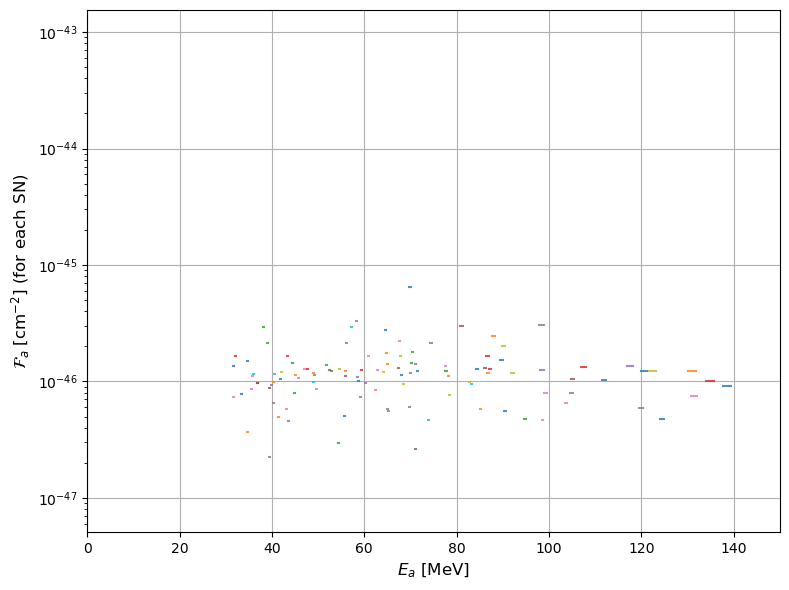

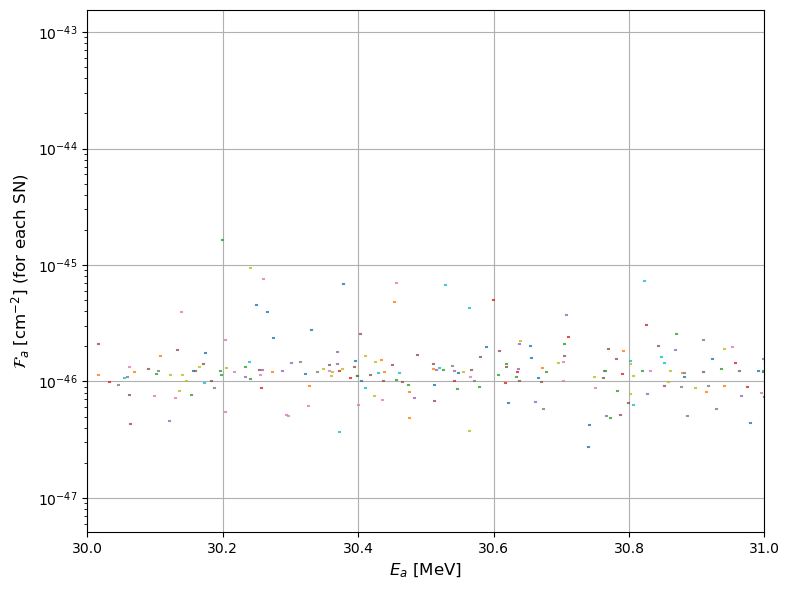

In [13]:
########
# PLOT #
# Example for 1 iteration and a fixed Mass #
########


# plot the contribution of each SN
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([0,150])
# plt.xlim([0,40])
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_a$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# zoom
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([maTEST,maTEST+1])
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_a$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

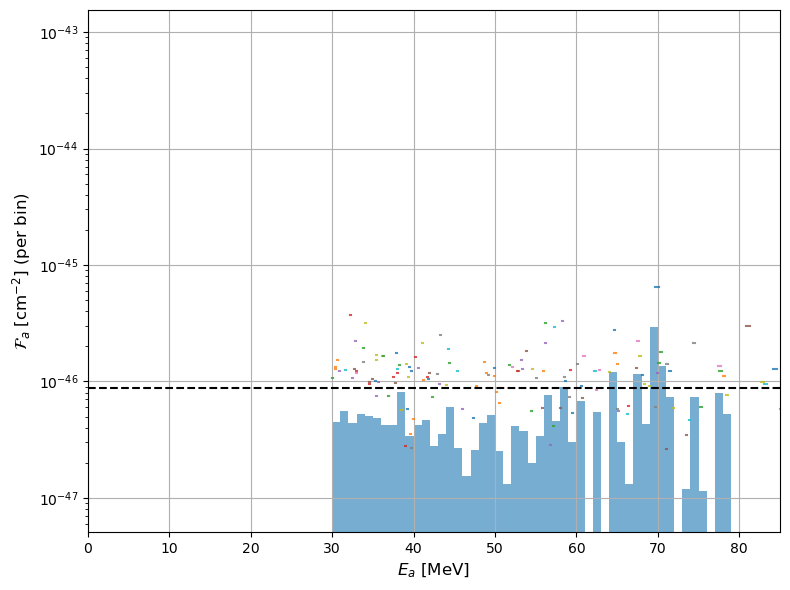

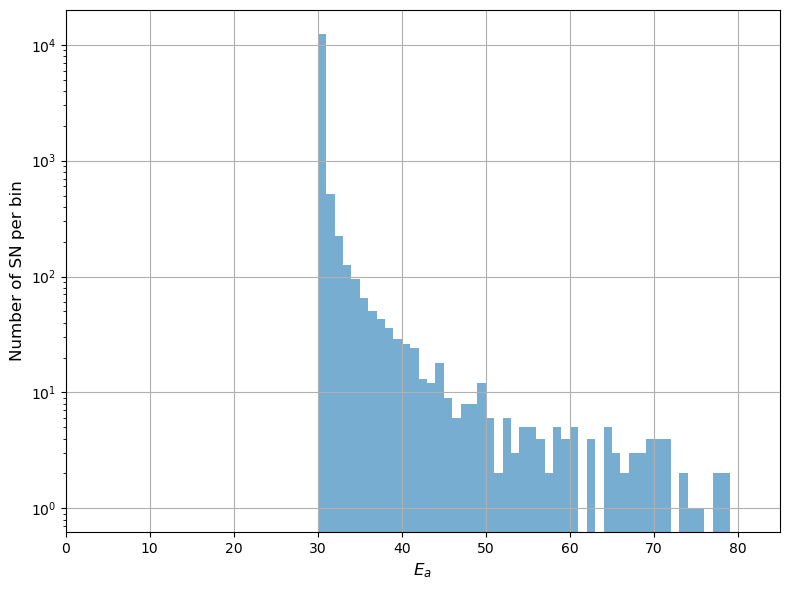

In [14]:
# plot the factor per bin (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
binwidth = 1
Ebins = np.arange(0, 80, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins, SN_num_bins, SN_indices_bins = SNdist.factor1simBINS(Erange, Ebins)

plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)
        
plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Approximation")

plt.xlim([0,85])
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}_a$ [$\mathrm{cm^{-2}}$] (per bin)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# number of SN per bin (each SN can contribute to more than 1 bin)
plt.figure(figsize=(8, 6))

plt.bar(bin_centers, SN_num_bins, width=np.diff(Ebins), align='center', alpha=0.6)

plt.xlim([0,85])
plt.yscale('log')
plt.xlabel("$E_a$", fontsize=12)
plt.ylabel("Number of SN per bin", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Mean of all simulations

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


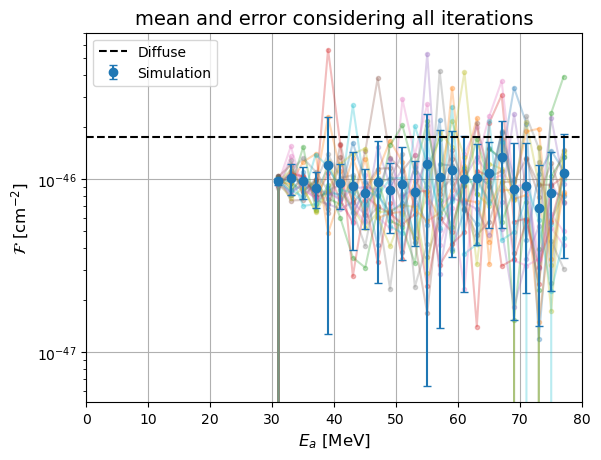

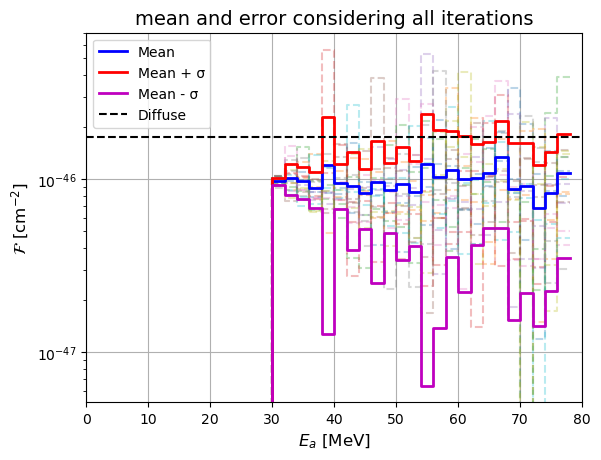

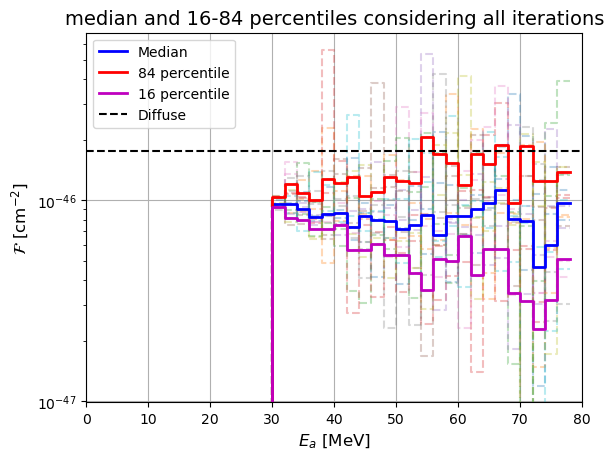

In [15]:

binwidth = 2
Ebins = np.arange(0, 78 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

mean_flux, std_flux, all_flux = SNdist.factorALLsimBINS(maTEST, ExpTIME, SN_sim, Ebins)



# plot each simulation
for sim in range(len(all_flux)):
    plt.plot(bin_centers, all_flux[sim], '.-', alpha=0.3)

# plot mean
plt.errorbar(bin_centers, mean_flux, yerr=std_flux, fmt='o', capsize=3, label = 'Simulation')
plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("mean and error considering all iterations", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()




# TO PLOT AS BINNED DATA

Ebins_edges = np.repeat(Ebins, 2)[1:-1]

# plot each simulation
for sim in range(len(all_flux)):
    all_flux_sim_edges = np.repeat(all_flux[sim], 2)
    plt.plot(Ebins_edges, all_flux_sim_edges, '--', alpha=0.3)

    
# plot mean
means_int_edges = np.repeat(mean_flux, 2)
std_devs_int_edges = np.repeat(std_flux, 2)

plt.plot(Ebins_edges, means_int_edges, 'b-', linewidth=2, label="Mean")
plt.plot(Ebins_edges, means_int_edges + std_devs_int_edges, 'r-', linewidth=2, label="Mean + σ")
plt.plot(Ebins_edges, means_int_edges - std_devs_int_edges, 'm-', linewidth=2, label="Mean - σ")

plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("mean and error considering all iterations", fontsize=14)
plt.legend()
plt.grid()
plt.show()



# with percentiles

binwidth = 2
Ebins = np.arange(0, 78 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])
Ebins_edges = np.repeat(Ebins, 2)[1:-1]


median_flux, p16_flux, p84_flux, all_flux = SNdist.factorALLsimBINS_percentile(maTEST, ExpTIME, SN_sim, Ebins)


# plot each simulation
for sim in range(len(all_flux)):
    all_flux_sim_edges = np.repeat(all_flux[sim], 2)
    plt.plot(Ebins_edges, all_flux_sim_edges, '--', alpha=0.3)


# plot mean
medians_int_edges = np.repeat(median_flux, 2)
p16_int_edges = np.repeat(p16_flux, 2)
p84_int_edges = np.repeat(p84_flux, 2)

plt.plot(Ebins_edges, medians_int_edges, 'b-', linewidth=2, label="Median")
plt.plot(Ebins_edges, p84_int_edges, 'r-', linewidth=2, label="84 percentile")
plt.plot(Ebins_edges, p16_int_edges, 'm-', linewidth=2, label="16 percentile")

plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E_a$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("median and 16-84 percentiles considering all iterations", fontsize=14)
plt.legend()
plt.grid()
plt.show()

## NOW SET THE CONSTRAINTS

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# to interpolate
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import interp1d

import sys
sys.path.insert(1, '../../Files')

import logo
from constants import Units, Constants
import SNprofiles
import ALPnucleonINT as ALPint

from ALPdetection import ALPphotonDET, ALPphotonDET_multi
from SNdistribution import SNdistribution

# 1. SN Profiles

In [17]:
# folder where the profiles are stored
dir_profiles = "../../ConfigFiles/SN-profiles/18MsolProgenitor-AB/"

# profiles
rho_file = dir_profiles + "rho_PROF1.dat"
Ye_file = dir_profiles + "Ye_PROF1.dat"
T_file = dir_profiles + "T_PROF1.dat"
lapse_file = dir_profiles + "lapse_PROF1.dat"
mphoton_file = dir_profiles + "mphoton_PROF1.dat"
npeff_file = dir_profiles + "npeff_PROF1.dat"
echempot_file = dir_profiles + "echempot_PROF1.dat"
Ymu_file = dir_profiles + "Ymu_PROF1.dat"
Ypi_file = dir_profiles + "Ypi_VIR_PROF1.dat"


#####################
# LOAD THE PROFILES #
#####################
# if use_saved_lapse=True uses the data in the "lapse_file", if False computes it and saves it in "lapse_file"

SN_prof = SNprofiles.SNprofiles_QCDALP(rho_file, 
                                       Ye_file, 
                                       T_file, 
                                       mphoton_file, 
                                       npeff_file, 
                                       echempot_file, 
                                       Ymu_file, 
                                       Ypi_file, 
                                       use_saved_lapse=True, lapse_file=lapse_file)


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNprofiles.py:160: RuntimeWarning: overflow encountered in exp
  return p**2 / (np.exp(p**2 / (2 * mnstar * T) - eta) + 1)
/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNprofiles.py:174: RuntimeWarning: overflow encountered in exp
  return (1 / np.pi**2) * p**2 / (np.exp(p**2 / (2 * mnstar * T) - eta) -1)


# 2. ALP-nucleon interactions (KSVZ)

# 2.1. Bremsstrahlung

In [18]:
# folder where the NSF are stored
dir_NSF = "../../ConfigFiles/SN-structurefunc/"

sx_file_KSVZ = dir_NSF + "sx_grid_KSVZ.dat"

NSF_KSVZ = ALPint.NuclStructFunc(Cap=-0.47, Can=0, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_KSVZ)

In [19]:
brems_KSVZ = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_KSVZ)

# 2.2 Pionic conversion

In [20]:
pion_KSVZ = ALPint.ALP_Pion(Cap=-0.47, Can=0, profile=SN_prof )

# 2.3 Photo-production   $\gamma$ p $\rightarrow$ p a

In [21]:
ALPphoton_KSVZ = ALPint.ALP_Photon( Cap=-0.47, profile=SN_prof)

# 3. Production and Absoption

In [22]:
# only bremsstrahlung and pionic conversion

production = [brems_KSVZ.dndEdt,
              pion_KSVZ.dndEdt]
absorption = [brems_KSVZ.lambdaam1,  
              pion_KSVZ.lambdaam1]

generator_KSVZ = ALPint.SN_particle_generator( profile=SN_prof, lambdaam1_all=absorption, dndEdt_all=production)

# 4. Detection in Super-Kamiokande

## Signal

Consider the process $ a p \rightarrow \gamma p$ in water Cherenkov detectors

## Cross-section and significance

The class $\bf{ALPphotonDET}$ defined in the imported module $\bf{ALPdetection}$ is used to compute the Exclusion significance.

Inputs:
- Cap: to define the model (note that only the ALP-proton coupling is relevant for detection)
- Deltat: time window [s] where the SN is producing ALPs (assuming that the spectrum is the same as in t=1 s after bounce)
- diffSNfactor: the flux factor that multiplies the flux of a single SN to account for the contribution of all past galactic SN [cm$^{-2}$ s$^{-1}$]

In [23]:
Deltat=1.5 # s

apgp_KSVZ = ALPphotonDET( Cap=-0.47, Deltat=Deltat, diffSNfactor=diffSNfactor )

### Photon spectra $\frac{dN_{\gamma}}{dE_{\gamma}}$

#### Interpolation dN^2/dEdt  (a grid of dNdEdt pre-saved)

In [24]:
# load
data = np.loadtxt("data/dNdEdt_KSVZ.dat", delimiter=" ")

# columns
ga_vals, ma_vals, Ea_vals, dNdEdt_vals = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

# unique values of ga
unique_ga = np.unique(ga_vals)

# unique values of ma
unique_ma = np.unique(ma_vals)


print('values of ga: \n', unique_ga)
print('\nvalues of ma: \n', unique_ma)

values of ga: 
 [2.00000e-06 3.16764e-06 5.01697e-06 7.94597e-06 1.25850e-05 1.99324e-05
 3.15693e-05 5.00000e-05 6.00000e-05 7.00000e-05 8.00000e-05 9.00000e-05
 1.00000e-04 2.00000e-04 3.00000e-04 4.00000e-04 5.00000e-04]

values of ma: 
 [1.0000e-01 1.0000e+00 5.7500e+00 8.4500e+00 1.0500e+01 1.5250e+01
 1.5900e+01 2.0000e+01 2.1200e+01 2.3350e+01 3.0800e+01 3.8250e+01
 4.2300e+01 4.5700e+01 5.3150e+01 6.0600e+01 6.3400e+01 6.8050e+01
 7.5500e+01 8.2950e+01 8.4500e+01 9.0400e+01 9.7850e+01 1.0530e+02
 1.0560e+02 1.1275e+02 1.2020e+02 1.2670e+02 1.2765e+02 1.3510e+02
 1.4255e+02 1.4780e+02 1.5000e+02 1.6890e+02 1.9000e+02]


##### Example: select a ga value

In [25]:
# select a single ga
gaTEST = unique_ga[13]

print("Selected ga =", gaTEST, f"        gap = {gaTEST*0.47:.3e}")

print(f'\nSimulation performed with ma = {maTEST} MeV')

Selected ga = 0.0002         gap = 9.400e-05

Simulation performed with ma = 30 MeV


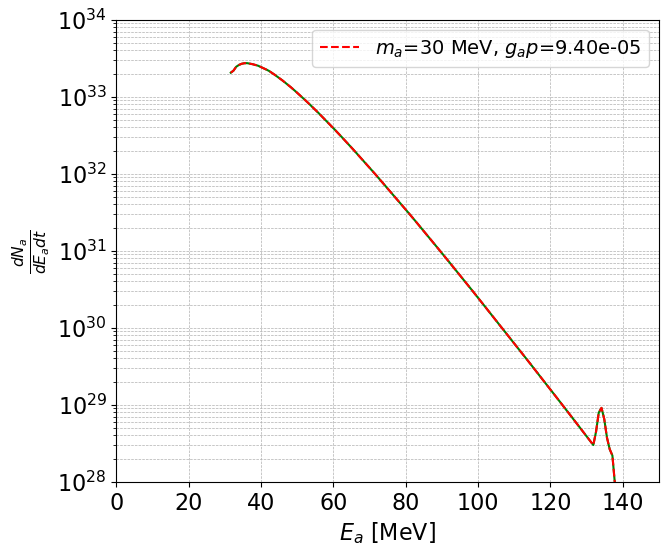

In [26]:
# create a mask to keep only the grid points with the selected ga value
mask = (ga_vals == gaTEST)

ma_subset = ma_vals[mask]
Ea_subset = Ea_vals[mask]
dNdEdt_subset = dNdEdt_vals[mask]




# Interpolate
dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)


# Create the function (last 2 arguments are dummies)
# we need this because dNdEd]t needs 3 variables (to be able to be used without a pre-saved grid)
def dNdEdt_aux(Ea, ma=None, ga=None):
    auxF = lambda Ea: dNdEdt_interpol(Ea, maTEST)
    return auxF(Ea)



# evaluate
Ea_plt = np.linspace(0, 150, 200) # MeV


dNdEdt_plt = dNdEdt_interpol(Ea_plt, maTEST)
dNdEdt_plt2 = dNdEdt_aux(Ea_plt)


# Plot
plt.figure(figsize=(7,6))
plt.plot(Ea_plt, dNdEdt_plt2, color='g')
plt.plot(Ea_plt, dNdEdt_plt, '--', label=f'$m_a$={maTEST} MeV, $g_ap$={gaTEST*0.47:.2e}', color='r')

plt.yscale("log")
plt.ylim(1e28,1e34)
plt.xlim(0,150)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E_{a}$ [MeV]', fontsize=16)
plt.ylabel(r'$\frac{dN_a}{dE_adt}$', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### FLUX OF ALL SN

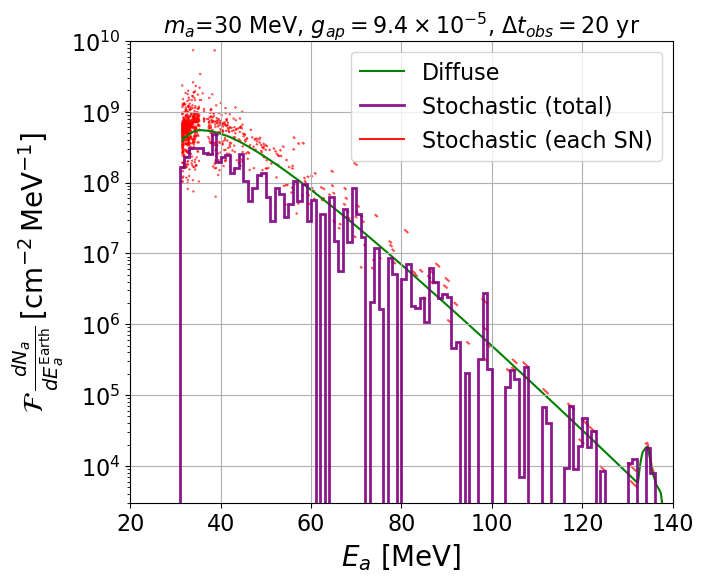

In [27]:
# Plot
plt.figure(figsize=(7,6))


# With diffuse approximation
Ea_plt_smo = np.linspace(0, 150, 1000) # MeV

dNdEdt_plt = dNdEdt_interpol(Ea_plt_smo, maTEST)

plt.plot(Ea_plt_smo, dNdEdt_plt * Deltat * diffSNfactor * ExpTIME * Units.stoMeVminus1, color='green', label='Diffuse', zorder=1)



# SN simulation per BIN (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
binwidth = 1
Ebins = np.arange(0, 150, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins = apgp_KSVZ.flux_1sim_BINS(Erange, Ebins, dNdEdt_aux, maTEST, gaTEST)

# plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.stairs(result_bins, edges=Ebins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic (total)', zorder=2) 



# each SN contribution individually
for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_plt = np.linspace(E1, E2, 10) # MeV
        flux = dNdEdt_interpol(Ea_plt, maTEST) * ( 1 / (4 * np.pi * (dSN * Units.kpctocm)**2) ) * Deltat * Units.stoMeVminus1 # cm^-2 MeV^-1
        plt.plot(Ea_plt, flux, color='red', alpha=0.7, zorder=0)

# dummy
plt.plot(np.array([-12,-10]), np.array([1,2]), color='red', alpha=0.9, label='Stochastic (each SN)')


plt.yscale("log")
plt.ylim(3e3,1e10)
plt.xlim(20,140)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E_{a}$ [MeV]', fontsize=20)
plt.ylabel(r'$\mathcal{F}\,\frac{dN_a}{dE_a^{\rm Earth}}\,[\mathrm{cm^{-2}\,MeV^{-1}}]$', fontsize=20)

plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4\times 10^{{-5}}$, $\Delta t_{{obs}}=20$ yr', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPflux.pdf", bbox_inches='tight', dpi=10)
plt.show()

In [28]:
# Integrate in E_chi and see the "mean" difference
diffFlux_plot = dNdEdt_plt * Deltat * diffSNfactor * ExpTIME * Units.stoMeVminus1
Integrated_F_smo = np.trapezoid(np.nan_to_num(diffFlux_plot, nan=0.0), Ea_plt_smo)

Integrated_F_sto = np.sum(result_bins * binwidth)

print('Integrated_F_sto /Integrated_F_smo:', Integrated_F_sto /Integrated_F_smo)

Integrated_F_sto /Integrated_F_smo: 0.508335809096349


### PHOTON SPECTRA FOR ALL SN

/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/ALPdetection.py:229: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = quad(


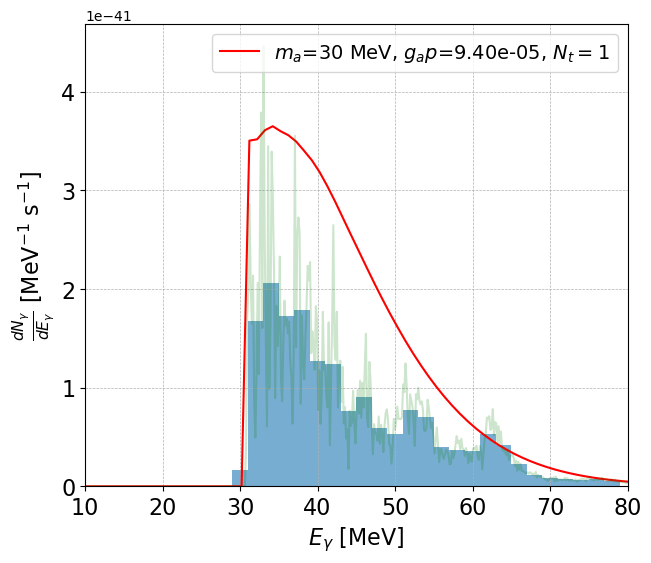

In [74]:
# Compute dσ/dEγ

# With diffuse approximation
Egamma_vals = np.linspace(0, 150, 150)

dNgammadEgamma_vals = [Units.stoMeVminus1 * 
                       apgp_KSVZ.dNgammadEgamma(E, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux )
                       for E in Egamma_vals]

# SN simulation (integrating each SN contribution)
Egamma_vals2 = np.linspace(0, 150, 1000)

dNgammadEgamma_vals_SIM = [Units.stoMeVminus1 * 
                       apgp_KSVZ.dNgammadEgamma_1sim(E, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
                        * (ExpTIME**-1) 
                       for E in Egamma_vals2]

# SN simulation per BIN (integrating each SN contribution)
#Egamma_bins = np.linspace(15, 80, 66)
binwidth = 2
Egamma_bins = np.arange(15, 80, binwidth)
bin_centers = 0.5 * (Egamma_bins[:-1] + Egamma_bins[1:])

dNgammadEgamma_vals_bin = Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )


# Plot
plt.figure(figsize=(7,6))
plt.plot(Egamma_vals, dNgammadEgamma_vals, label=fr'$m_a$={maTEST} MeV, $g_ap$={gaTEST*0.47:.2e}, $N_t=1$', color='r')
plt.plot(Egamma_vals2, dNgammadEgamma_vals_SIM, color='green', alpha=0.2)
plt.bar(bin_centers, dNgammadEgamma_vals_bin, width=np.diff(Egamma_bins), align='center', alpha=0.6)

# plt.yscale("log")
plt.xlim(10,80)
# plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E_{\gamma}$ [MeV]', fontsize=16)
plt.ylabel(r'$\frac{dN_{\gamma}}{dE_{\gamma}}$ [MeV$^{-1}$ s$^{-1}$]', fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## 5. DATA: load SK IV expected and observed events

In [29]:
# Super Kamiokande phase IV:
NtSK = 10**9 * 2 * 6.022 * 10**23 * 22.5 / 18  # Number of targets
exptSKIV = 2970*24*60*60 # 2970 days = 8.13 years



# Load SKIV data (assuming tab-separated values)
SKIV_data = pd.read_csv("../../ExpData/SK/SKIV.txt", sep='\s+') #delim_whitespace=True)#, header=None)




# Define energy bins
bins_SKIV = np.arange(16, 80, 2)

# Measured background (Poissonian error)
Nobs_SKIV = np.array([(SKIV_data.iloc[i, 0], SKIV_data.iloc[i, 1]) for i in range(1, len(SKIV_data) - 2)])

# Expected total background INCLUDING DSNB model
Bth_SKIV = np.array([(SKIV_data.iloc[i, 0], SKIV_data.iloc[i, 2] + SKIV_data.iloc[i, 3]) for i in range(1, len(SKIV_data) - 2)])


#### Plot for a particular simulation

ga = 0.0002         gap = 9.400e-05
ma = 30 MeV


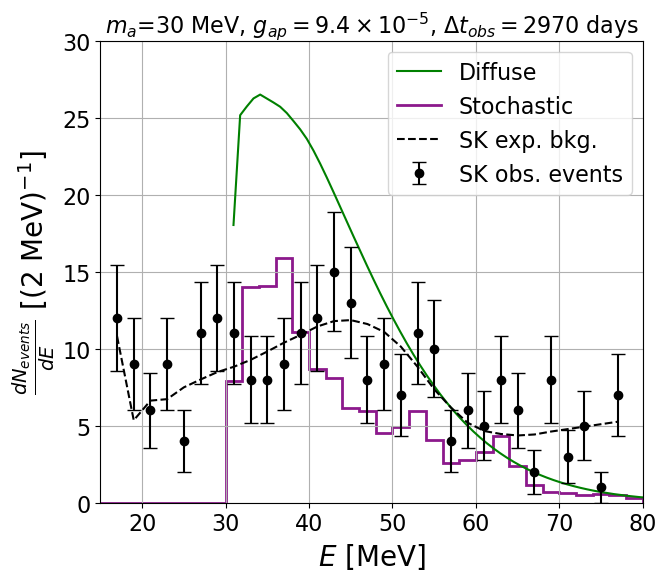

In [30]:
print("ga =", gaTEST, f"        gap = {gaTEST*0.47:.3e}")

print(f'ma = {maTEST} MeV')



# COMPUTE THE EXPECTED SIGNAL

# Compute dσ/dEγ

# With diffuse approximation
Egamma_vals1 = np.linspace(30.95, 150, 150)

dNgammadEgamma_vals = [2* NtSK * exptSKIV * 
                       Units.stoMeVminus1 * 
                       apgp_KSVZ.dNgammadEgamma(E, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux ) 
                       for E in Egamma_vals1]



# SN simulation per BIN (integrating each SN contribution)
binwidth = 2
Egamma_bins = np.arange(14, 81, binwidth)
bin_centers = 0.5 * (Egamma_bins[:-1] + Egamma_bins[1:])

dNgammadEgamma_vals_bin = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )




# Plot
plt.figure(figsize=(7,6))

plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')
plt.stairs(dNgammadEgamma_vals_bin, edges=Egamma_bins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic') 
plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')


# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
# plt.title(" SK-IV ", fontsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4 \times 10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPsignal.pdf", bbox_inches='tight')
plt.show()

ga = 0.0002         gap = 9.400e-05
ma = 30 MeV


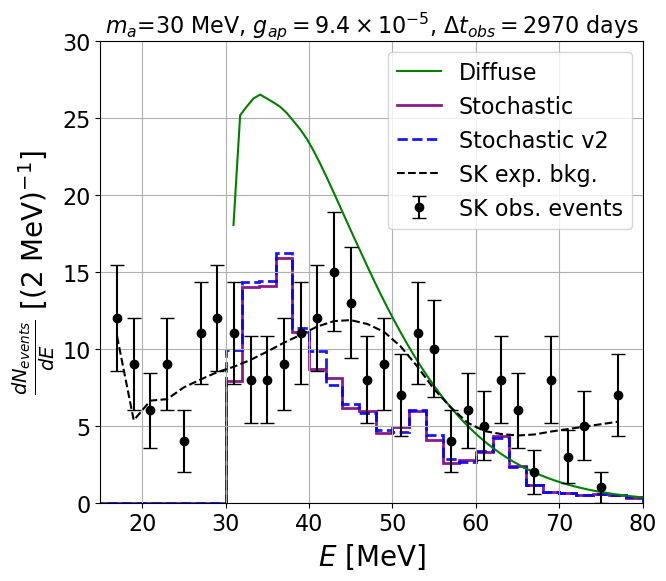

In [31]:
print("ga =", gaTEST, f"        gap = {gaTEST*0.47:.3e}")

print(f'ma = {maTEST} MeV')



# COMPUTE THE EXPECTED SIGNAL

# Compute dσ/dEγ

# Plot
plt.figure(figsize=(7,6))


# With diffuse approximation
Egamma_vals1 = np.linspace(30.95, 150, 150)

dNgammadEgamma_vals = [2* NtSK * exptSKIV * 
                       Units.stoMeVminus1 * 
                       apgp_KSVZ.dNgammadEgamma(E, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux ) 
                       for E in Egamma_vals1]


# Stochastic
# ALP energy bins (MeV)
binwidth = 1
Ebins = np.arange(0, 150, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

# Compute the binned fluence:
result_bins = apgp_KSVZ.flux_1sim_BINS(Erange, Ebins, dNdEdt_aux, maTEST, gaTEST)



# Egamma bins (MeV)
binwidth_2 = 2
Egamma_bins_2 = np.arange(14, 81, binwidth_2)
bin_centers_2 = 0.5 * (Egamma_bins_2[:-1] + Egamma_bins_2[1:])

dNgammadEgamma_vals_bin_2 = 2* NtSK * (exptSKIV/ExpTIME) * apgp_KSVZ.dspectra_from_fluence_BINS(Egamma_bins_2, Ebins, result_bins, maTEST, gaTEST)





plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')
plt.stairs(dNgammadEgamma_vals_bin, edges=Egamma_bins, fill=False, color='purple', linewidth=2, alpha=0.9, label='Stochastic') 
plt.stairs(dNgammadEgamma_vals_bin_2, edges=Egamma_bins, fill=False, color='blue', linestyle='--', linewidth=2, alpha=0.9, label='Stochastic v2') 
plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')


# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
# plt.title(" SK-IV ", fontsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4 \times 10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

# plt.savefig("figures/ALPsignal_TOcompare.pdf", bbox_inches='tight')
plt.show()

In [32]:
# Integrate in E_recc and see the "mean" difference
dNgammadEgamma_vals = np.array(dNgammadEgamma_vals)
Integrated_N_smo = np.trapezoid(np.nan_to_num(dNgammadEgamma_vals, nan=0.0), Egamma_vals1)

bin_widths = np.diff(Egamma_bins)
Integrated_N_sto = np.sum(dNgammadEgamma_vals_bin * bin_widths)

print('Integrated_N_sto /Integrated_N_smo:', Integrated_N_sto /Integrated_N_smo)



# Integrate in E_recc and see the "mean" difference
dNgammadEgamma_vals = np.array(dNgammadEgamma_vals)
Integrated_N_smo = np.trapezoid(np.nan_to_num(dNgammadEgamma_vals, nan=0.0), Egamma_vals1)

bin_widths_2 = np.diff(Egamma_bins_2)
Integrated_N_sto_2 = np.sum(dNgammadEgamma_vals_bin_2 * bin_widths_2)

print('Integrated_N_sto_2 /Integrated_N_smo:', Integrated_N_sto_2 /Integrated_N_smo)

Integrated_N_sto /Integrated_N_smo: 0.5055875285868934
Integrated_N_sto_2 /Integrated_N_smo: 0.521991128944418


#### Plot for all 20 simulations (takes some time)

ga = 0.0002         gap = 9.400e-05
ma = 30 MeV


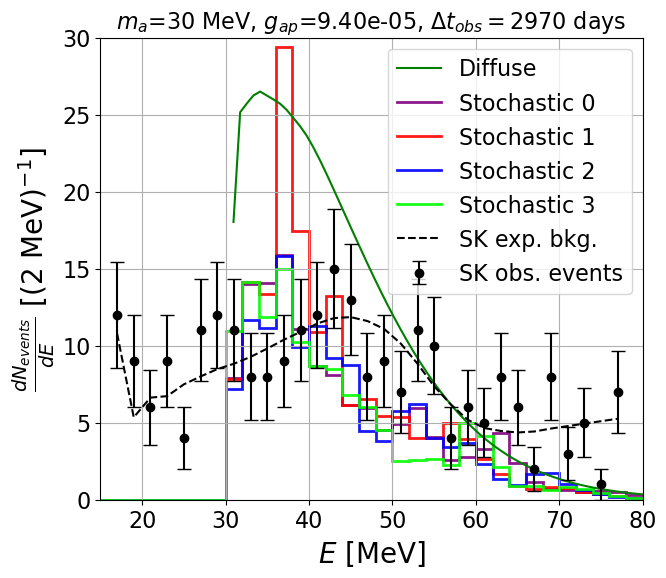

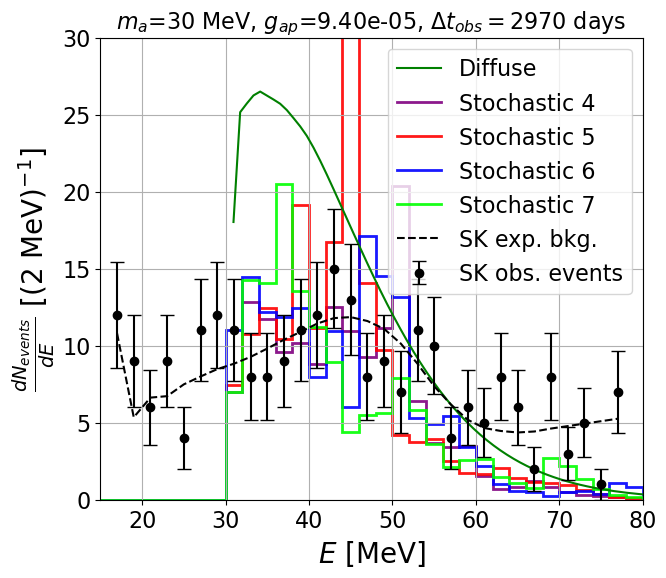

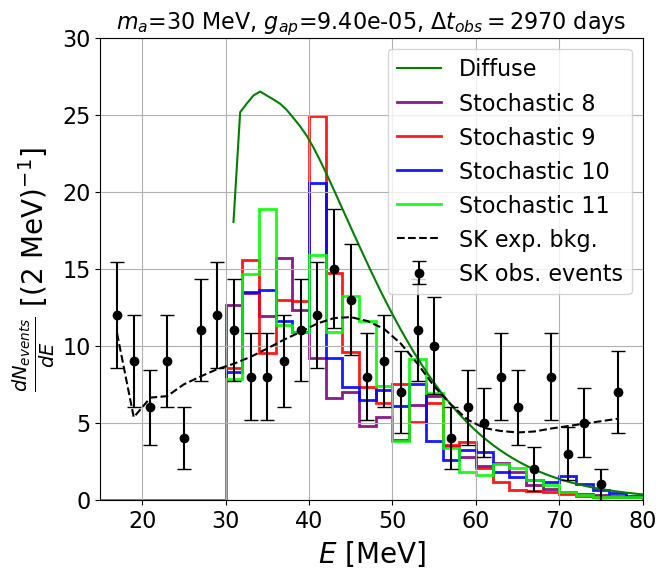

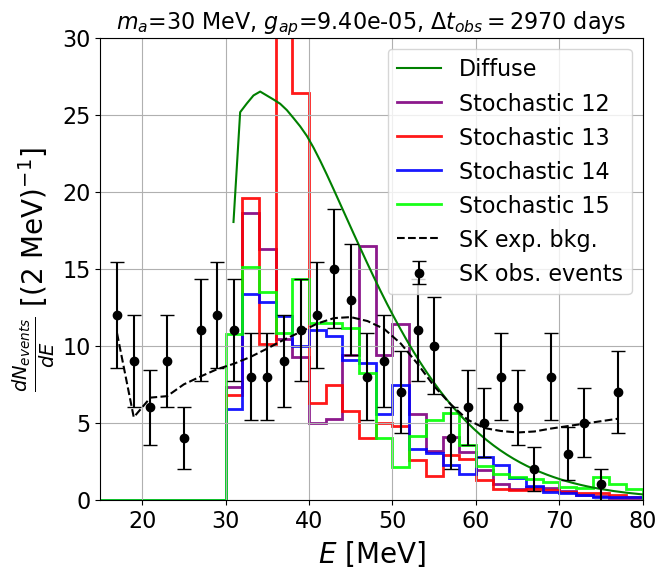

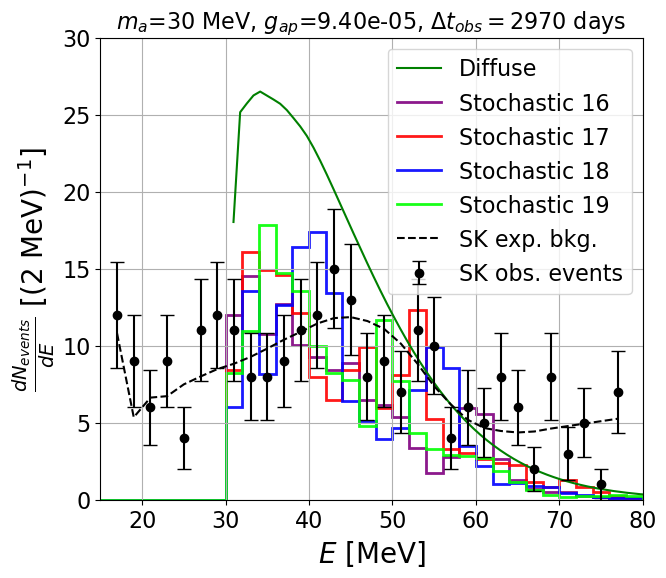

In [65]:
print("ga =", gaTEST, f"        gap = {gaTEST*0.47:.3e}")

print(f'ma = {maTEST} MeV')



# COMPUTE THE EXPECTED SIGNAL

# Compute dσ/dEγ

# With diffuse approximation
Egamma_vals1 = np.linspace(30.95, 150, 150)

dNgammadEgamma_vals = [2* NtSK * exptSKIV * 
                       Units.stoMeVminus1 * 
                       apgp_KSVZ.dNgammadEgamma(E, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux ) 
                       for E in Egamma_vals1]

# SN simulation per BIN (integrating each SN contribution)
binwidth = 2
Egamma_bins = np.arange(14, 81, binwidth)
bin_centers = 0.5 * (Egamma_bins[:-1] + Egamma_bins[1:])


# Plot
plt.figure(figsize=(7,6))
plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')

# Generate Erange for the selected iteration
i_unis = 0
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_0 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_0, edges=Egamma_bins, fill=False, color='purple', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 1
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_1 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_1, edges=Egamma_bins, fill=False, color='red', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 2
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_2 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_2, edges=Egamma_bins, fill=False, color='blue', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 3
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_3 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_3, edges=Egamma_bins, fill=False, color='lime', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')

plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}$={gaTEST*0.47:.2e}, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)
plt.show()




# Plot
plt.figure(figsize=(7,6))
plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')

# Generate Erange for the selected iteration
i_unis = 4
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_4 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_4, edges=Egamma_bins, fill=False, color='purple', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 5
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_5 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_5, edges=Egamma_bins, fill=False, color='red', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 6
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_6 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_6, edges=Egamma_bins, fill=False, color='blue', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 7
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_7 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_7, edges=Egamma_bins, fill=False, color='lime', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')

plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}$={gaTEST*0.47:.2e}, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)
plt.show()




# Plot
plt.figure(figsize=(7,6))
plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')

# Generate Erange for the selected iteration
i_unis = 8
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_8 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_8, edges=Egamma_bins, fill=False, color='purple', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 9
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_9 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_9, edges=Egamma_bins, fill=False, color='red', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 10
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_10 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_10, edges=Egamma_bins, fill=False, color='blue', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 11
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_11 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_11, edges=Egamma_bins, fill=False, color='lime', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')

plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}$={gaTEST*0.47:.2e}, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)
plt.show()




# Plot
plt.figure(figsize=(7,6))
plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')

# Generate Erange for the selected iteration
i_unis = 12
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_12 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_12, edges=Egamma_bins, fill=False, color='purple', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 13
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_13 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_13, edges=Egamma_bins, fill=False, color='red', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 14
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_14 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_14, edges=Egamma_bins, fill=False, color='blue', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 15
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_15 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_15, edges=Egamma_bins, fill=False, color='lime', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')

plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}$={gaTEST*0.47:.2e}, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)
plt.show()




# Plot
plt.figure(figsize=(7,6))
plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')

# Generate Erange for the selected iteration
i_unis = 16
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_16 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_16, edges=Egamma_bins, fill=False, color='purple', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 17
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_17 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_17, edges=Egamma_bins, fill=False, color='red', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 18
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_18 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_18, edges=Egamma_bins, fill=False, color='blue', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

# Generate Erange for the selected iteration
i_unis = 19
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])
dNgammadEgamma_vals_bin_19 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )
plt.stairs(dNgammadEgamma_vals_bin_19, edges=Egamma_bins, fill=False, color='lime', linewidth=2, linestyle='-', alpha=0.9, label=f'Stochastic {i_unis}') 

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')

plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}$={gaTEST*0.47:.2e}, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)
plt.show()

#### Just reorder to make them nicer

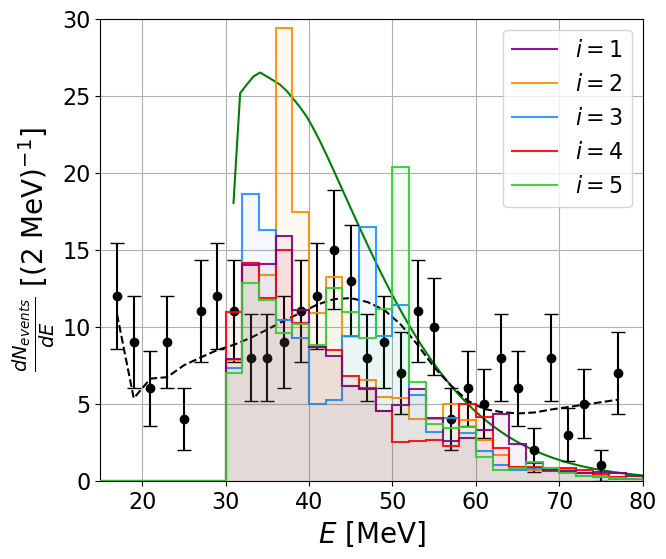

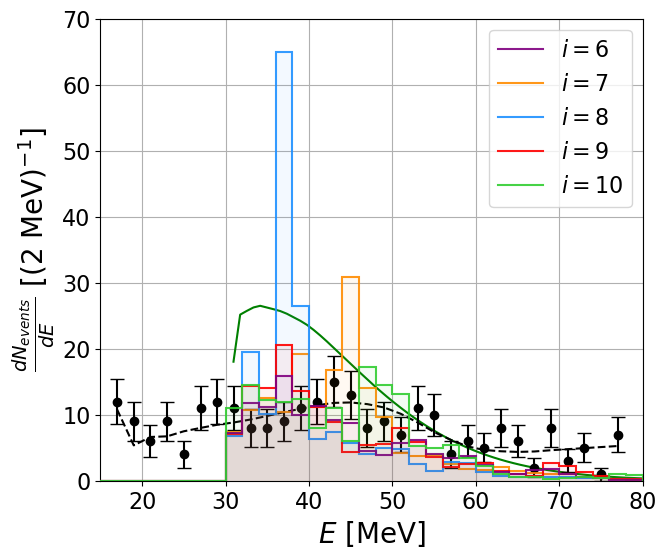

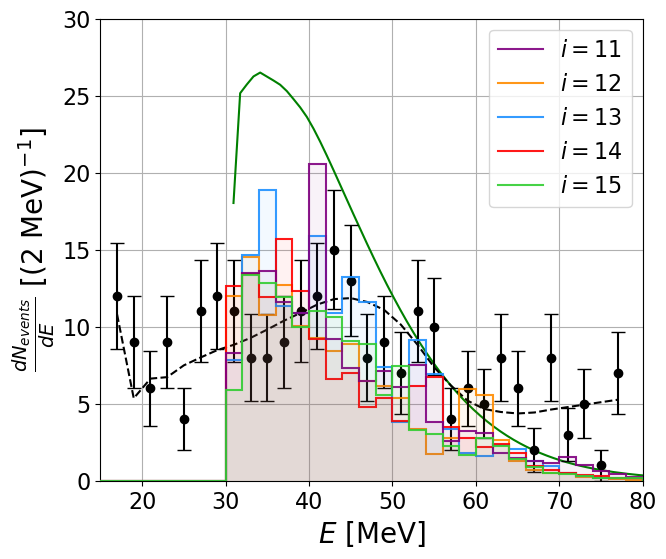

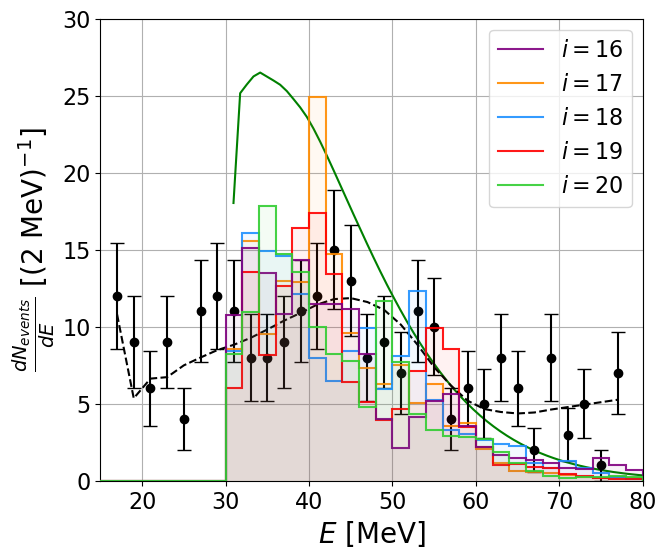

In [94]:
# Plot
plt.figure(figsize=(7,6))

plt.plot(Egamma_vals1, dNgammadEgamma_vals, color='green')

plt.stairs(dNgammadEgamma_vals_bin_0, edges=Egamma_bins, fill=False, edgecolor='purple', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=1$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_0, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

plt.stairs(dNgammadEgamma_vals_bin_1, edges=Egamma_bins, fill=False, edgecolor='darkorange', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=2$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_1, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_12, edges=Egamma_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=3$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_12, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_3, edges=Egamma_bins, fill=False, edgecolor='red', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=4$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_3, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_4, edges=Egamma_bins, fill=False, edgecolor='limegreen', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=5$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_4, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10)

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5)

# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
# plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4\times10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPsignal_5A.pdf", bbox_inches='tight')
plt.show()




# Plot
plt.figure(figsize=(7,6))

plt.plot(Egamma_vals1, dNgammadEgamma_vals, color='green')

plt.stairs(dNgammadEgamma_vals_bin_2, edges=Egamma_bins, fill=False, edgecolor='purple', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=6$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_2, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

plt.stairs(dNgammadEgamma_vals_bin_5, edges=Egamma_bins, fill=False, edgecolor='darkorange', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=7$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_5, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_13, edges=Egamma_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=8$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_13, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_7, edges=Egamma_bins, fill=False, edgecolor='red', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=9$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_7, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_6, edges=Egamma_bins, fill=False, edgecolor='limegreen', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=10$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_6, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10)

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5)

# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,70)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
# plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4\times10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPsignal_5B.pdf", bbox_inches='tight')
plt.show()




# Plot
plt.figure(figsize=(7,6))

plt.plot(Egamma_vals1, dNgammadEgamma_vals, color='green')

plt.stairs(dNgammadEgamma_vals_bin_10, edges=Egamma_bins, fill=False, edgecolor='purple', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=11$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_10, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

plt.stairs(dNgammadEgamma_vals_bin_16, edges=Egamma_bins, fill=False, edgecolor='darkorange', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=12$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_16, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_11, edges=Egamma_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=13$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_11, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_8, edges=Egamma_bins, fill=False, edgecolor='red', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=14$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_8, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_14, edges=Egamma_bins, fill=False, edgecolor='limegreen', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=15$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_14, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10)

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5)

# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
# plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4\times10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPsignal_5C.pdf", bbox_inches='tight')
plt.show()




# Plot
plt.figure(figsize=(7,6))

plt.plot(Egamma_vals1, dNgammadEgamma_vals, color='green')

plt.stairs(dNgammadEgamma_vals_bin_15, edges=Egamma_bins, fill=False, edgecolor='purple', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=16$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_15, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.05, zorder=10) 

plt.stairs(dNgammadEgamma_vals_bin_9, edges=Egamma_bins, fill=False, edgecolor='darkorange', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=17$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_9, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_17, edges=Egamma_bins, fill=False, edgecolor='dodgerblue', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=18$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_17, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_18, edges=Egamma_bins, fill=False, edgecolor='red', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=19$', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_18, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='red', alpha=0.05, zorder=5) 

plt.stairs(dNgammadEgamma_vals_bin_19, edges=Egamma_bins, fill=False, edgecolor='limegreen', linewidth=1.5, linestyle='-', alpha=0.9, label='$i=20$', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_19, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='limegreen', alpha=0.05, zorder=10)

plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5)

# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
# plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4\times10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPsignal_5D.pdf", bbox_inches='tight')
plt.show()

#### And plot 3 selected simulations

ga = 0.0002         gap = 9.400e-05
ma = 30 MeV


/home/andres/CompuTools/Trabajos/Supernovas/SN-and-ALPs/03-SN-ALP-program/Work/../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


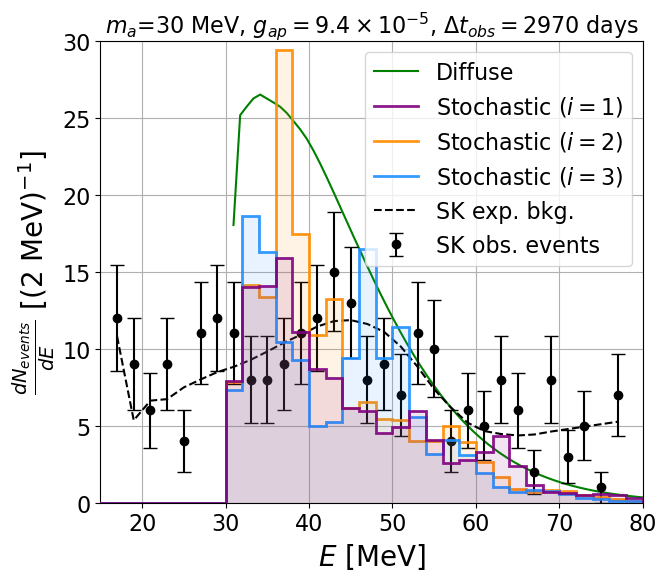

In [64]:


print("ga =", gaTEST, f"        gap = {gaTEST*0.47:.3e}")

print(f'ma = {maTEST} MeV')



# COMPUTE THE EXPECTED SIGNAL

# Compute dσ/dEγ

# With diffuse approximation
Egamma_vals1 = np.linspace(30.95, 150, 150)

dNgammadEgamma_vals = [2* NtSK * exptSKIV * 
                       Units.stoMeVminus1 * 
                       apgp_KSVZ.dNgammadEgamma(E, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux ) 
                       for E in Egamma_vals1]


# Plot
plt.figure(figsize=(7,6))

plt.plot(Egamma_vals1, dNgammadEgamma_vals, label=fr'Diffuse', color='green')



# SN simulation per BIN (integrating each SN contribution)
binwidth = 2
Egamma_bins = np.arange(14, 81, binwidth)
bin_centers = 0.5 * (Egamma_bins[:-1] + Egamma_bins[1:])



# Generate Erange for the selected iteration
i_unis = 0
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])

dNgammadEgamma_vals_bin_0 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )

plt.stairs(dNgammadEgamma_vals_bin_0, edges=Egamma_bins, fill=False, edgecolor='purple', linewidth=2, linestyle='-', alpha=0.9, label='Stochastic ($i=1$)', zorder=10) 
plt.stairs(dNgammadEgamma_vals_bin_0, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='purple', alpha=0.1, zorder=10) 


# Generate Erange for the selected iteration
i_unis = 1
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])

dNgammadEgamma_vals_bin_1 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )

plt.stairs(dNgammadEgamma_vals_bin_1, edges=Egamma_bins, fill=False, edgecolor='darkorange', linewidth=2, linestyle='-', alpha=0.9, label='Stochastic ($i=2$)', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_1, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='darkorange', alpha=0.1, zorder=5) 


# Generate Erange for the selected iteration
i_unis = 12
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[i_unis])

dNgammadEgamma_vals_bin_12 = 2* NtSK * exptSKIV * Units.stoMeVminus1 * (ExpTIME**-1) * apgp_KSVZ.dNgammadEgamma_1sim_BINS(Egamma_bins, ma=maTEST, ga=gaTEST, dNdEdt=dNdEdt_aux, Erange=Erange )

plt.stairs(dNgammadEgamma_vals_bin_12, edges=Egamma_bins, fill=False, edgecolor='dodgerblue', linewidth=2, linestyle='-', alpha=0.9, label='Stochastic ($i=3$)', zorder=5) 
plt.stairs(dNgammadEgamma_vals_bin_12, edges=Egamma_bins, fill=True, edgecolor='none', facecolor='dodgerblue', alpha=0.1, zorder=5) 



plt.plot(Bth_SKIV[:,0], Bth_SKIV[:,1], c="black", ls="--", label=r"SK exp. bkg.")
plt.errorbar(Nobs_SKIV[:,0], Nobs_SKIV[:,1], yerr=Nobs_SKIV[:,1]**0.5, fmt='o', color='black', ecolor='black', capsize=5, label='SK obs. events')

# plt.yscale("log")
plt.xlim(15,80)
plt.ylim(0,30)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel(r'$E$ [MeV]', fontsize=20)
plt.ylabel(r'$\frac{dN_{events}}{dE}$ [(2 MeV)$^{-1}$]', fontsize=20)
plt.title(fr'$m_a$={maTEST} MeV, $g_{{ap}}=9.4\times10^{{-5}}$, $\Delta t_{{obs}}=2970$ days', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid(True)

plt.savefig("figures/ALPsignal_triple.pdf", bbox_inches='tight')
plt.show()

### Significance

The function $\bf{Zthobs}$ and $\bf{Zthobs\_1sim}$ inside the class $\bf{ALPphotonDET}$ compute the significance

Inputs:
- ma: axion mass,
- ga: axion coupling,
- dNdEdt: ALP spectrum generated by a single SN as a function of Ea, ma, ga (internally computes dNgammadEgamma[Ea, ma, ga]),
- Ntargets: number of targets in the detector,
- exptime: exposure time of the considered experimental RUN, in seconds,
- bins: list of energy bins,
- Bth: number of EXPECTED background events per bin,
- Nobs: number of OBSERVED events per bin

 - Erange (ONLY for Zthobs_1sim): SN-Earth distance and ALP energy range that reach Earth for the time window

#### For a benchmark point

##### for a continuous ALP spectrum (i.e. diffuse or effective stochastic approximation) use $\bf{Zthobs}$

In [34]:
start_time = time.time()
result = apgp_KSVZ.Zthobs(maTEST, gaTEST, dNdEdt_aux, NtSK, exptSKIV, bins_SKIV, Bth_SKIV, Nobs_SKIV)
end_time = time.time()

print("Execution Time:", end_time - start_time, "seconds")
print("Z Value:", result)

Execution Time: 0.8368740081787109 seconds
Z Value: [99]


##### for a multiple contributions (i.e. the full stochastic approach) use $\bf{Zthobs_1sim}$

In [99]:
start_time = time.time()
result = apgp_KSVZ.Zthobs_1sim(maTEST, gaTEST, dNdEdt_aux, NtSK, exptSKIV* (ExpTIME**-1), bins_SKIV, Bth_SKIV, Nobs_SKIV, Erange)
end_time = time.time()

print("Execution Time:", end_time - start_time, "seconds")
print("Z Value:", result)

Execution Time: 78.73674845695496 seconds
Z Value: [np.float64(2.166267693838046)]


### For a grid

#### 1. Diffuse approximation (TAKES TIME, already saved)

In [ ]:
with open("data/Z_KSVZ_diffuse_4pi.txt", "w") as f:
    f.write("# m_a[MeV] g_a Z\n")  # Header
   

ma_plt = np.logspace(0, 2, 100)
   
# Loop (ga, ma)
for j, ga_j in enumerate(unique_ga):  # Index j for ga
    print("Working on ga: ", ga_j)
   
    mask = (ga_vals == ga_j)
   
    ma_subset = ma_vals[mask]
    Ea_subset = Ea_vals[mask]
    dNdEdt_subset = dNdEdt_vals[mask]
   
   
    # Interpolate
    dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)
   
   
    for i, ma_i in enumerate(ma_plt):  # Index i for ma
       
        # last 2 arguments are dummies
        def dNdEdt_aux(Ea, ma=None, ga=None):
            auxF = lambda Ea: dNdEdt_interpol(Ea, ma_i)
            return auxF(Ea)
       
       
        # Evaluate Zthobs and store in Z_value
        Z_value = apgp_KSVZ.Zthobs(ma_i, ga_j, dNdEdt_aux, NtSK, exptSKIV, bins_SKIV, Bth_SKIV, Nobs_SKIV)[0]

        # Append result to file
        with open("data/Z_KSVZ_diffuse_4pi.txt", "a") as f:
            f.write(f"{ma_i} {ga_j} {Z_value}\n")

print("\nDONE")

#### 2. For each one of the 20 simulations (TAKES TIME, already saved)

##### Massless regime: m_a < 1 MeV

Notice we use the spectrum computed for m=1 MeV in every case, 

but keep the mass as a variable in 
  - the computation of the Z and,
  - the computation of the energy of the incoming ALPs (in Erange, the analysis of the galactic SN history)

In [ ]:


ma_plt = np.logspace(np.log10(0.25), np.log10(0.95), 10)
    
    
# loop in universes
for iit in range(0,20):
    
    with open("data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe" + str(iit) + ".txt", "w") as f:
        f.write("# m_a[MeV] g_a Z\n")  # Header
    
    # Loop (ga, ma)
    for j, ga_j in enumerate(unique_ga[6:]):  # Index j for ga
        print("Working on ga: ", ga_j)

        mask = (ga_vals == ga_j)

        ma_subset = ma_vals[mask]
        Ea_subset = Ea_vals[mask]
        dNdEdt_subset = dNdEdt_vals[mask]


        # Interpolate
        dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)


        for i, ma_i in enumerate(ma_plt):  # Index i for ma

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(ma_i, ExpTIME, SN_sim[iit])
            
            massless_fixed = 1 # MeV (massless regime)

            # last 2 arguments are dummies
            def dNdEdt_aux(Ea, ma=None, ga=None):
                auxF = lambda Ea: dNdEdt_interpol(Ea, massless_fixed)
                return auxF(Ea)


            # Evaluate Zthobs and store in Z_value
            Z_value = apgp_KSVZ.Zthobs_1sim(ma_i, ga_j, dNdEdt_aux, NtSK, exptSKIV/ExpTIME, bins_SKIV, Bth_SKIV, Nobs_SKIV, Erange)[0]

            # Append result to file
            with open("data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe" + str(iit) + ".txt", "a") as f:
                f.write(f"{ma_i} {ga_j} {Z_value}\n")

    print("\nDONE universe ", iit)
    print('\n----------------------')
    print('')

##### Massive regime: m_a > 1 MeV

Now the mass varies in the spectrum also

In [ ]:


ma_plt = np.logspace(0, 1.85, 15)
    
    
# loop in universes
for iit in range(0,20):
    
    with open("data/ALP-sims/Z_KSVZ_stochastic_sim_universe" + str(iit) + ".txt", "w") as f:
        f.write("# m_a[MeV] g_a Z\n")  # Header
    
    # Loop (ga, ma)
    for j, ga_j in enumerate(unique_ga[6:]):  # Index j for ga
        print("Working on ga: ", ga_j)

        mask = (ga_vals == ga_j)

        ma_subset = ma_vals[mask]
        Ea_subset = Ea_vals[mask]
        dNdEdt_subset = dNdEdt_vals[mask]


        # Interpolate
        dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)


        for i, ma_i in enumerate(ma_plt):  # Index i for ma

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(ma_i, ExpTIME, SN_sim[iit])
            

            # last 2 arguments are dummies
            def dNdEdt_aux(Ea, ma=None, ga=None):
                auxF = lambda Ea: dNdEdt_interpol(Ea, ma_i)
                return auxF(Ea)


            # Evaluate Zthobs and store in Z_value
            Z_value = apgp_KSVZ.Zthobs_1sim(ma_i, ga_j, dNdEdt_aux, NtSK, exptSKIV/ExpTIME, bins_SKIV, Bth_SKIV, Nobs_SKIV, Erange)[0]

            # Append result to file
            with open("data/ALP-sims/Z_KSVZ_stochastic_sim_universe" + str(iit) + ".txt", "a") as f:
                f.write(f"{ma_i} {ga_j} {Z_value}\n")

    print("\nDONE universe ", iit)
    print('\n----------------------')
    print('')

# HK

In [22]:
# Hyper Kamiokande:
NtHK = 10**9 * 2 * 6.022 * 10**23 * 187 / 18  # Number of targets
exptHK = 10*365*24*60*60 # 10 years



# Load HK data (assuming tab-separated values)
HK_data = pd.read_csv("../../ExpData/SK/HK.txt", sep='\s+')# delim_whitespace=True)#, header=None)




# Define energy bins
bins_HK = np.arange(16, 51, 2)

# Expected total background INCLUDING DSNB model
Bth_HK = np.array([(HK_data.iloc[i, 0], HK_data.iloc[i, 1]) for i in range(0, len(HK_data))])


#### 1. Diffuse approximation (TAKES TIME, already saved)

In [ ]:
with open("data/Z_KSVZ_diffuse_HK.txt", "w") as f:
    f.write("# m_a[MeV] g_a Z\n")  # Header
    

ma_plt = np.logspace(0, 2, 100)
    
# Loop (ga, ma)
for j, ga_j in enumerate(unique_ga):  # Index j for ga
    print("Working on ga: ", ga_j)
    
    mask = (ga_vals == ga_j)
    
    ma_subset = ma_vals[mask]
    Ea_subset = Ea_vals[mask]
    dNdEdt_subset = dNdEdt_vals[mask]
    
    
    # Interpolate
    dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)
    
    
    for i, ma_i in enumerate(ma_plt):  # Index i for ma
        
        # last 2 arguments are dummies
        def dNdEdt_aux(Ea, ma=None, ga=None):
            auxF = lambda Ea: dNdEdt_interpol(Ea, ma_i)
            return auxF(Ea)
        
        
        # Evaluate Zthexp and store in Z_value
        Z_value = apgp_KSVZ.Zthexp(ma_i, ga_j, dNdEdt_aux, NtHK, exptHK, bins_HK, Bth_HK)[0]

        # Append result to file
        with open("data/Z_KSVZ_diffuse_HK.txt", "a") as f:
            f.write(f"{ma_i} {ga_j} {Z_value}\n")

print("\nDONE")

#### 2. For each one of the 20 simulations (TAKES TIME, already saved)

##### Massless regime: m_a < 1 MeV

Notice we use the spectrum computed for m=1 MeV in every case, 

but keep the mass as a variable in 
  - the computation of the Z and,
  - the computation of the energy of the incoming ALPs (in Erange, the analysis of the galactic SN history)

In [69]:


ma_plt = np.logspace(np.log10(0.25), np.log10(0.95), 10)
    
    
# loop in universes
for iit in range(0,20):
    
    with open("data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe" + str(iit) + ".txt", "w") as f:
        f.write("# m_a[MeV] g_a Z\n")  # Header
    
    # Loop (ga, ma)
    for j, ga_j in enumerate(unique_ga):  # Index j for ga
        print("Working on ga: ", ga_j)

        mask = (ga_vals == ga_j)

        ma_subset = ma_vals[mask]
        Ea_subset = Ea_vals[mask]
        dNdEdt_subset = dNdEdt_vals[mask]


        # Interpolate
        dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)


        for i, ma_i in enumerate(ma_plt):  # Index i for ma

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(ma_i, ExpTIME, SN_sim[iit])
            
            massless_fixed = 1 # MeV (massless regime)

            # last 2 arguments are dummies
            def dNdEdt_aux(Ea, ma=None, ga=None):
                auxF = lambda Ea: dNdEdt_interpol(Ea, massless_fixed)
                return auxF(Ea)


            # Evaluate Zthobs and store in Z_value
            Z_value = apgp_KSVZ.Zthexp_1sim(ma_i, ga_j, dNdEdt_aux, NtHK, exptHK/ExpTIME, bins_HK, Bth_HK, Erange)[0]

            # Append result to file
            with open("data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe" + str(iit) + ".txt", "a") as f:
                f.write(f"{ma_i} {ga_j} {Z_value}\n")

    print("\nDONE universe ", iit)
    print('\n----------------------')
    print('')

Working on ga:  2e-06


/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


Working on ga:  3.16764e-06
Working on ga:  5.01697e-06
Working on ga:  7.94597e-06
Working on ga:  1.2585e-05
Working on ga:  1.99324e-05
Working on ga:  3.15693e-05
Working on ga:  5e-05
Working on ga:  6e-05
Working on ga:  7e-05
Working on ga:  8e-05
Working on ga:  9e-05
Working on ga:  0.0001
Working on ga:  0.0002
Working on ga:  0.0003
Working on ga:  0.0004
Working on ga:  0.0005

DONE universe  0

----------------------

Working on ga:  2e-06
Working on ga:  3.16764e-06
Working on ga:  5.01697e-06
Working on ga:  7.94597e-06
Working on ga:  1.2585e-05
Working on ga:  1.99324e-05
Working on ga:  3.15693e-05
Working on ga:  5e-05
Working on ga:  6e-05
Working on ga:  7e-05
Working on ga:  8e-05
Working on ga:  9e-05
Working on ga:  0.0001
Working on ga:  0.0002
Working on ga:  0.0003
Working on ga:  0.0004
Working on ga:  0.0005

DONE universe  1

----------------------

Working on ga:  2e-06
Working on ga:  3.16764e-06
Working on ga:  5.01697e-06
Working on ga:  7.94597e-06
Wo

##### Massive regime: m_a > 1 MeV

Now the mass varies in the spectrum also

In [70]:


ma_plt = np.logspace(0, 1.85, 15)
    
    
# loop in universes
for iit in range(0,20):
    
    with open("data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe" + str(iit) + ".txt", "w") as f:
        f.write("# m_a[MeV] g_a Z\n")  # Header
    
    # Loop (ga, ma)
    for j, ga_j in enumerate(unique_ga):  # Index j for ga
        print("Working on ga: ", ga_j)

        mask = (ga_vals == ga_j)

        ma_subset = ma_vals[mask]
        Ea_subset = Ea_vals[mask]
        dNdEdt_subset = dNdEdt_vals[mask]


        # Interpolate
        dNdEdt_interpol = LinearNDInterpolator(list(zip(Ea_subset, ma_subset)), dNdEdt_subset)


        for i, ma_i in enumerate(ma_plt):  # Index i for ma

            # Generate Erange for the selected iteration
            Erange = SNdist.Eflux1sim(ma_i, ExpTIME, SN_sim[iit])
            

            # last 2 arguments are dummies
            def dNdEdt_aux(Ea, ma=None, ga=None):
                auxF = lambda Ea: dNdEdt_interpol(Ea, ma_i)
                return auxF(Ea)


            # Evaluate Zthobs and store in Z_value
            Z_value = apgp_KSVZ.Zthexp_1sim(ma_i, ga_j, dNdEdt_aux, NtHK, exptHK/ExpTIME, bins_HK, Bth_HK, Erange)[0]

            # Append result to file
            with open("data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe" + str(iit) + ".txt", "a") as f:
                f.write(f"{ma_i} {ga_j} {Z_value}\n")

    print("\nDONE universe ", iit)
    print('\n----------------------')
    print('')

Working on ga:  2e-06
Working on ga:  3.16764e-06
Working on ga:  5.01697e-06
Working on ga:  7.94597e-06
Working on ga:  1.2585e-05
Working on ga:  1.99324e-05
Working on ga:  3.15693e-05
Working on ga:  5e-05
Working on ga:  6e-05
Working on ga:  7e-05
Working on ga:  8e-05
Working on ga:  9e-05
Working on ga:  0.0001
Working on ga:  0.0002
Working on ga:  0.0003
Working on ga:  0.0004
Working on ga:  0.0005

DONE universe  0

----------------------

Working on ga:  2e-06
Working on ga:  3.16764e-06
Working on ga:  5.01697e-06
Working on ga:  7.94597e-06
Working on ga:  1.2585e-05
Working on ga:  1.99324e-05
Working on ga:  3.15693e-05
Working on ga:  5e-05
Working on ga:  6e-05
Working on ga:  7e-05
Working on ga:  8e-05
Working on ga:  9e-05
Working on ga:  0.0001
Working on ga:  0.0002
Working on ga:  0.0003
Working on ga:  0.0004
Working on ga:  0.0005

DONE universe  1

----------------------

Working on ga:  2e-06
Working on ga:  3.16764e-06
Working on ga:  5.01697e-06
Working 

## PLOT

In [23]:
#### PREVIOUS BOUNDS ####

# cooling bounds
datacool = np.loadtxt("../../ExpData/gaN_bounds/cooling_bounds.dat")

macool = datacool[:,0] / 1.e6 # convert to MeV
gap_cool = datacool[:,1]  



# SNO bounds ma array
dataSNO = np.loadtxt("../../ExpData/gaN_bounds/SNO_gap.txt")

maSNO = dataSNO[:,0] / 1.e6 # convert to MeV
gap_SNO = dataSNO[:,1] 

In [24]:
# FUNCTION TO LOAD ALL THE CONSTRAINTS

def load_and_prepare_grid(filename, y_scale=0.47):
    data = np.loadtxt(filename)
    # y_scale needed because    g_ap = C_ap * g_a
    X, Y, Z = data[:, 0], data[:, 1] * y_scale, data[:, 2]

    x_unique = np.unique(X)
    y_unique = np.unique(Y)
    X_grid, Y_grid = np.meshgrid(x_unique, y_unique)
    Z_grid = np.zeros_like(X_grid)

    for i in range(len(X)):
        x_idx = np.where(x_unique == X[i])[0][0]
        y_idx = np.where(y_unique == Y[i])[0][0]
        Z_grid[y_idx, x_idx] = Z[i]

    return X_grid, Y_grid, Z_grid

# Files
files = {
    "SKIVdiff": "data/Z_KSVZ_diffuse_4pi.txt",
    "SKIVsim0": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe0.txt",
    "SKIVsim1": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe1.txt",
    "SKIVsim2": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe2.txt",
    "SKIVsim3": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe3.txt",
    "SKIVsim4": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe4.txt",
    "SKIVsim5": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe5.txt",
    "SKIVsim6": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe6.txt",
    "SKIVsim7": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe7.txt",
    "SKIVsim8": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe8.txt",
    "SKIVsim9": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe9.txt",
    "SKIVsim10": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe10.txt",
    "SKIVsim11": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe11.txt",
    "SKIVsim12": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe12.txt",
    "SKIVsim13": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe13.txt",
    "SKIVsim14": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe14.txt",
    "SKIVsim15": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe15.txt",
    "SKIVsim16": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe16.txt",
    "SKIVsim17": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe17.txt",
    "SKIVsim18": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe18.txt",
    "SKIVsim19": "data/ALP-sims/Z_KSVZ_stochastic_sim_universe19.txt",
    # "SKIVsim0_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe0.txt",
    # "SKIVsim1_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe1.txt",
    # "SKIVsim2_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe2.txt",
    # "SKIVsim3_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe3.txt",
    # "SKIVsim4_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe4.txt",
    # "SKIVsim5_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe5.txt",
    # "SKIVsim6_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe6.txt",
    # "SKIVsim7_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe7.txt",
    # "SKIVsim8_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe8.txt",
    # "SKIVsim9_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe9.txt",
    # "SKIVsim10_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe10.txt",
    # "SKIVsim11_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe11.txt",
    # "SKIVsim12_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe12.txt",
    # "SKIVsim13_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe13.txt",
    # "SKIVsim14_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe14.txt",
    # "SKIVsim15_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe15.txt",
    # "SKIVsim16_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe16.txt",
    # "SKIVsim17_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe17.txt",
    # "SKIVsim18_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe18.txt",
    # "SKIVsim19_m": "data/ALP-sims/Z_KSVZ_stochastic_massless_sim_universe19.txt",
    "HKdiff": "data/Z_KSVZ_diffuse_HK.txt",
    "HKsim0": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe0.txt",
    "HKsim1": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe1.txt",
    "HKsim2": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe2.txt",
    "HKsim3": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe3.txt",
    "HKsim4": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe4.txt",
    "HKsim5": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe5.txt",
    "HKsim6": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe6.txt",
    "HKsim7": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe7.txt",
    "HKsim8": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe8.txt",
    "HKsim9": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe9.txt",
    "HKsim10": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe10.txt",
    "HKsim11": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe11.txt",
    "HKsim12": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe12.txt",
    "HKsim13": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe13.txt",
    "HKsim14": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe14.txt",
    "HKsim15": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe15.txt",
    "HKsim16": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe16.txt",
    "HKsim17": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe17.txt",
    "HKsim18": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe18.txt",
    "HKsim19": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_sim_universe19.txt",
    # "HKsim0_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe0.txt",
    # "HKsim1_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe1.txt",
    # "HKsim2_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe2.txt",
    # "HKsim3_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe3.txt",
    # "HKsim4_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe4.txt",
    # "HKsim5_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe5.txt",
    # "HKsim6_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe6.txt",
    # "HKsim7_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe7.txt",
    # "HKsim8_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe8.txt",
    # "HKsim9_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe9.txt",
    # "HKsim10_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe10.txt",
    # "HKsim11_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe11.txt",
    # "HKsim12_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe12.txt",
    # "HKsim13_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe13.txt",
    # "HKsim14_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe14.txt",
    # "HKsim15_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe15.txt",
    # "HKsim16_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe16.txt",
    # "HKsim17_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe17.txt",
    # "HKsim18_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe18.txt",
    # "HKsim19_m": "data/ALP-sims-HK/Z_KSVZ_HK_stochastic_massless_sim_universe19.txt"
}

# Dictionary to save the results
grids = {}

for label, filepath in files.items():
    Xg, Yg, Zg = load_and_prepare_grid(filepath)
    grids[label] = {"X": Xg, "Y": Yg, "Z": Zg}

In [75]:
# COMPUTE THE MEAN AND 1 STANDARD DEVIATION --- MEDIAN AND 16-84 PERCENTILES

# for massive ALPs

Z_stack_all = np.stack([grids[f"SKIVsim{i}"]["Z"] for i in range(0,20)])

Z_mean = Z_stack_all.mean(axis=0)
Z_std = Z_stack_all.std(axis=0)

Z_median = np.median(Z_stack_all, axis=0)
Z_p16, Z_p84 = np.percentile(Z_stack_all, [16, 84], axis=0)



Z_stack_all_HK = np.stack([grids[f"HKsim{i}"]["Z"] for i in range(0,20)])

Z_mean_HK = Z_stack_all_HK.mean(axis=0)
Z_std_HK = Z_stack_all_HK.std(axis=0)

Z_median_HK = np.median(Z_stack_all_HK, axis=0)
Z_p16_HK, Z_p84_HK = np.percentile(Z_stack_all_HK, [16, 84], axis=0)


#### with mean and std

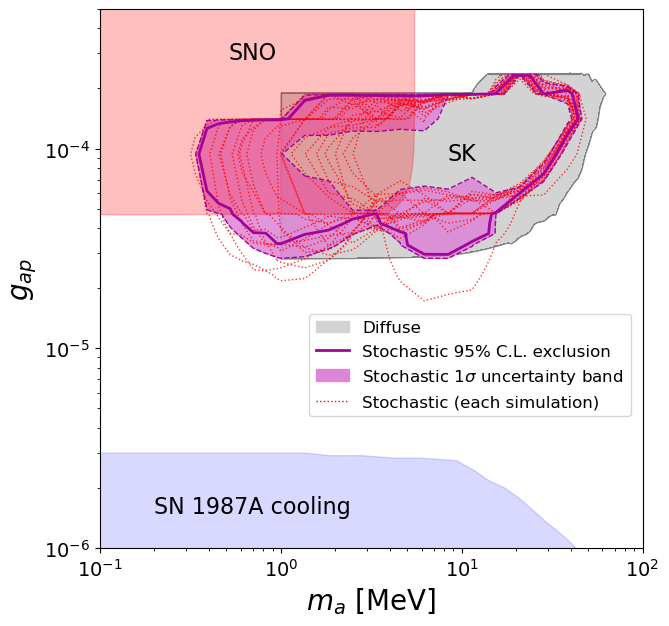

In [31]:
# Z value to plot contour
Z_level = 1.96

# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'


# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)



# # SK diffuse approximation
contour = ax.contour(grids["SKIVdiff"]["X"], grids["SKIVdiff"]["Y"], grids["SKIVdiff"]["Z"], 
                     levels=[Z_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

contourf = ax.contourf(grids["SKIVdiff"]["X"], grids["SKIVdiff"]["Y"], grids["SKIVdiff"]["Z"], 
                        levels=[Z_level, grids["SKIVdiff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# SK universe (massive and massless ALPs)
ax.contour(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_mean, 
           levels=[Z_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_mean + Z_std, 
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_mean - Z_std, 
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

# Z_level - 1σ
ax.contourf(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_mean + Z_std, 
            levels=[Z_level, Z_mean.max()], colors=[colorfill], alpha=0.85)

# # Z_level + 1σ
ax.contourf(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_mean - Z_std, 
            levels=[Z_level, Z_mean.max()], colors=['lightgray'], alpha=1.0)


coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["SKIVsim"+str(uni)]["X"], grids["SKIVsim"+str(uni)]["Y"], grids["SKIVsim"+str(uni)]["Z"], levels=[Z_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)




# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, gap_cool, 1e-8, color='blue', alpha=0.15)

# SNO
ax.fill_between(maSNO, gap_SNO, color='red', alpha=0.25)


# cosmetic
ax.hlines(0.476*4.99e-4,13.95,45.85,color="gray",linewidth=1.5, zorder=0)
ax.vlines(1, 2.82e-5, 1.9175e-4,color="gray",linewidth=1, zorder=0)

ax.hlines(0.47*4.99e-4,19.4,23.85,color=colorline,linewidth=2, zorder=2)
ax.hlines(0.475*4.99e-4,18.8,26,color=colorline,linewidth=1, linestyle='--', zorder=2)



# more text
ax.text(7e-1, 1.5e-6, 'SN 1987A cooling', color='black', fontsize=16, rotation=0, ha='center')
ax.text(1e1, 8.8e-5, 'SK', color=colortext, fontsize=16, rotation=0, ha='center')
ax.text(7e-1, 2.8e-4, 'SNO', color='black', fontsize=16, rotation=0, ha='center')


ax.set_xlabel('$m_a$ [MeV]', fontsize=20)
ax.set_ylabel('$g_{ap}$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1, 1e2)
ax.set_ylim(1e-6, 5e-4)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 95% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 


ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim], fontsize=12, loc='upper left', bbox_to_anchor=(0.37, 0.45))

plt.savefig("figures/boundsSK_g_vs_ma.pdf", bbox_inches='tight')
plt.show()

#### HK with mean and std

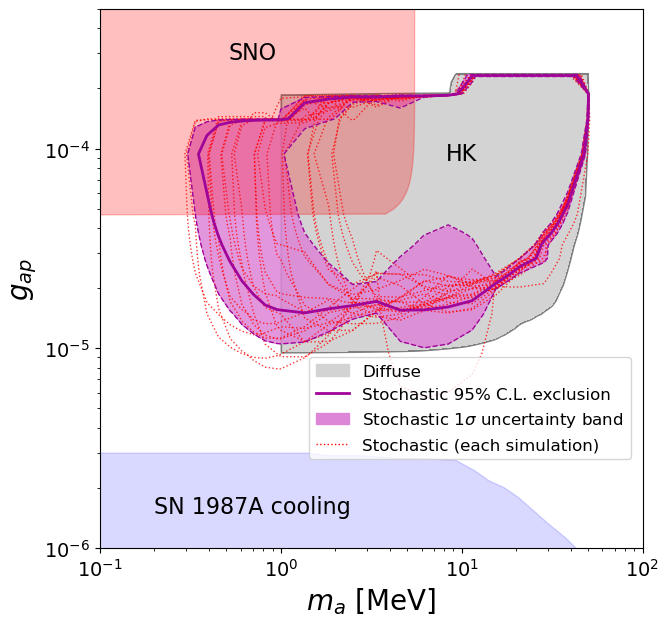

In [129]:
# Z value to plot contour
Z_level = 1.96

# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'

colorfill2 = 'orange'
colorline2 = 'darkorange'

# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)



# # SK diffuse approximation
contour = ax.contour(grids["HKdiff"]["X"], grids["HKdiff"]["Y"], grids["HKdiff"]["Z"], 
                     levels=[Z_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

contourf = ax.contourf(grids["HKdiff"]["X"], grids["HKdiff"]["Y"], grids["HKdiff"]["Z"], 
                        levels=[Z_level, grids["HKdiff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)



# mean and std
# SK universe (massive and massless ALPs)
ax.contour(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_mean_HK,
           levels=[Z_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_mean_HK + Z_std_HK,
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_mean_HK - Z_std_HK,
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

# Z_level - 1σ
ax.contourf(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_mean_HK + Z_std_HK,
            levels=[Z_level, 999], colors=[colorfill], alpha=0.85)

# # Z_level + 1σ
ax.contourf(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_mean_HK - Z_std_HK,
            levels=[Z_level, Z_mean_HK.max()], colors=['lightgray'], alpha=1.0)


coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["HKsim"+str(uni)]["X"], grids["HKsim"+str(uni)]["Y"], grids["HKsim"+str(uni)]["Z"], levels=[Z_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)




# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, gap_cool, 1e-8, color='blue', alpha=0.15)

# SNO
ax.fill_between(maSNO, gap_SNO, color='red', alpha=0.25)


# cosmetic
ax.hlines(0.476*4.99e-4,9.33,50.4,color="gray",linewidth=1.5, zorder=0)
ax.vlines(1, 9.42e-6, 1.87e-4,color="gray",linewidth=1, zorder=0)

ax.hlines(0.47*4.99e-4,11.43,43.4,color=colorline,linewidth=2, zorder=2)
ax.hlines(0.475*4.99e-4,11,44,color=colorline,linewidth=1, linestyle='--', zorder=2)
ax.hlines(0.465*4.99e-4,12.3,40,color=colorline,linewidth=1, linestyle='--', zorder=2)



# more text
ax.text(7e-1, 1.5e-6, 'SN 1987A cooling', color='black', fontsize=16, rotation=0, ha='center')
ax.text(1e1, 8.8e-5, 'HK', color=colortext, fontsize=16, rotation=0, ha='center')
ax.text(7e-1, 2.8e-4, 'SNO', color='black', fontsize=16, rotation=0, ha='center')


ax.set_xlabel('$m_a$ [MeV]', fontsize=20)
ax.set_ylabel('$g_{ap}$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1, 1e2)
ax.set_ylim(1e-6, 5e-4)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 95% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 


ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim], fontsize=12, loc='upper left', bbox_to_anchor=(0.37, 0.37))

plt.savefig("figures/boundsHK_g_vs_ma.pdf", bbox_inches='tight')
plt.show()

#### with median and percentiles

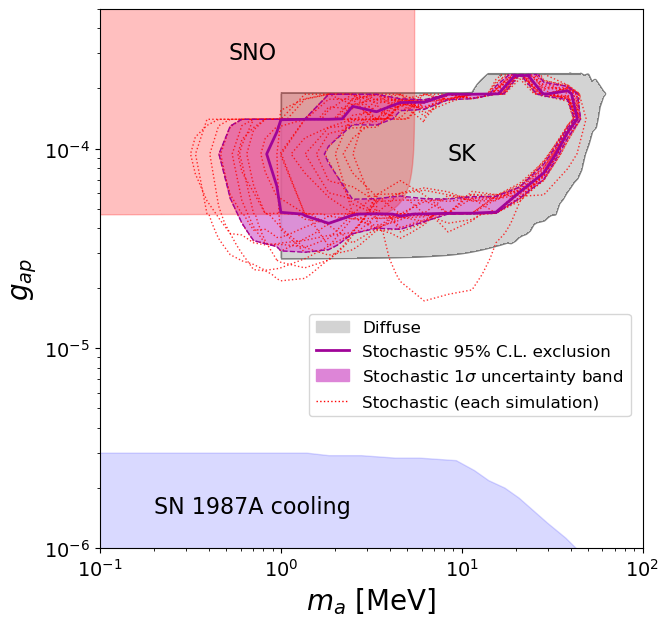

In [32]:
# Z value to plot contour
Z_level = 1.96

# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'

colorfill2 = 'orange'
colorline2 = 'darkorange'

# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)



# # SK diffuse approximation
contour = ax.contour(grids["SKIVdiff"]["X"], grids["SKIVdiff"]["Y"], grids["SKIVdiff"]["Z"], 
                     levels=[Z_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

contourf = ax.contourf(grids["SKIVdiff"]["X"], grids["SKIVdiff"]["Y"], grids["SKIVdiff"]["Z"], 
                        levels=[Z_level, grids["SKIVdiff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# median and percentiles
# SK universe (massive and massless ALPs)
ax.contour(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_median,
           levels=[Z_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_p84,
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_p16,
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

# Z_level - 1σ
ax.contourf(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_p84,
            levels=[Z_level, Z_median.max()], colors=[colorfill], alpha=0.85)

# # Z_level + 1σ
ax.contourf(grids["SKIVsim10"]["X"], grids["SKIVsim10"]["Y"], Z_p16,
            levels=[Z_level, Z_median.max()], colors=['lightgray'], alpha=1.0)



coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["SKIVsim"+str(uni)]["X"], grids["SKIVsim"+str(uni)]["Y"], grids["SKIVsim"+str(uni)]["Z"], levels=[Z_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)




# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, gap_cool, 1e-8, color='blue', alpha=0.15)

# SNO
ax.fill_between(maSNO, gap_SNO, color='red', alpha=0.25)


# cosmetic
ax.hlines(0.476*4.99e-4,13.95,45.85,color="gray",linewidth=1.5, zorder=0)
ax.vlines(1, 2.82e-5, 1.9175e-4,color="gray",linewidth=1, zorder=0)

ax.hlines(0.47*4.99e-4,19.4,23.85,color=colorline,linewidth=2, zorder=2)
ax.hlines(0.475*4.99e-4,18.8,26,color=colorline,linewidth=1, linestyle='--', zorder=2)



# more text
ax.text(7e-1, 1.5e-6, 'SN 1987A cooling', color='black', fontsize=16, rotation=0, ha='center')
ax.text(1e1, 8.8e-5, 'SK', color=colortext, fontsize=16, rotation=0, ha='center')
ax.text(7e-1, 2.8e-4, 'SNO', color='black', fontsize=16, rotation=0, ha='center')


ax.set_xlabel('$m_a$ [MeV]', fontsize=20)
ax.set_ylabel('$g_{ap}$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1, 1e2)
ax.set_ylim(1e-6, 5e-4)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 95% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 


ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim], fontsize=12, loc='upper left', bbox_to_anchor=(0.37, 0.45))

plt.savefig("figures/boundsSK_g_vs_ma_median.pdf", bbox_inches='tight')
plt.show()

#### HK median and percentiles

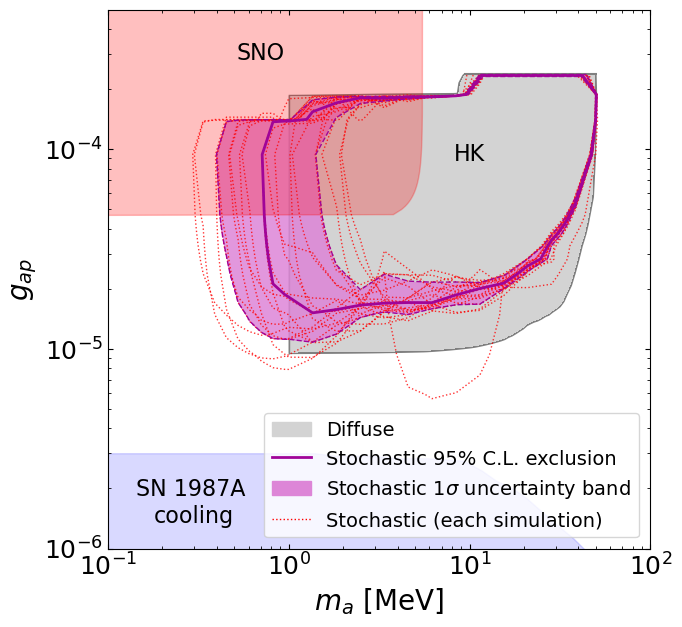

In [147]:
# Z value to plot contour
Z_level = 1.96

# colors
colorfill = 'xkcd:lavender pink'
colorline = 'xkcd:barney purple'
colortext = 'black'

colorfill2 = 'orange'
colorline2 = 'darkorange'

# PLOT
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)



# # SK diffuse approximation
contour = ax.contour(grids["HKdiff"]["X"], grids["HKdiff"]["Y"], grids["HKdiff"]["Z"], 
                     levels=[Z_level], colors="gray", linewidths=3, linestyles='-', zorder=0)

contourf = ax.contourf(grids["HKdiff"]["X"], grids["HKdiff"]["Y"], grids["HKdiff"]["Z"], 
                        levels=[Z_level, grids["HKdiff"]["Z"].max()], colors=["lightgray"], alpha=1, zorder=0)


# median and percentiles
# SK universe (massive and massless ALPs)
ax.contour(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_median_HK,
           levels=[Z_level], colors=colorline, linewidths=2, linestyles='-')

ax.contour(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_p84_HK,
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

ax.contour(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_p16_HK,
           levels=[Z_level], colors=colorline, linewidths=1, linestyles='--')

# Z_level - 1σ
ax.contourf(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_p84_HK,
            levels=[Z_level, 999], colors=[colorfill], alpha=0.85)

# # Z_level + 1σ
ax.contourf(grids["HKsim10"]["X"], grids["HKsim10"]["Y"], Z_p16_HK,
            levels=[Z_level, Z_median_HK.max()], colors=['lightgray'], alpha=1.0)



coloruni = 'red'
for uni in range(0,20):
    ax.contour(grids["HKsim"+str(uni)]["X"], grids["HKsim"+str(uni)]["Y"], grids["HKsim"+str(uni)]["Z"], levels=[Z_level], colors=coloruni, linewidths=1, linestyles=':', alpha=0.8, zorder=1)




# OTHER BOUNDS
# Cooling bounds
ax.fill_between(macool, gap_cool, 1e-8, color='blue', alpha=0.15)

# SNO
ax.fill_between(maSNO, gap_SNO, color='red', alpha=0.25)


# cosmetic
ax.hlines(0.476*4.99e-4,9.33,50.4,color="gray",linewidth=1.5, zorder=0)
ax.vlines(1, 9.42e-6, 1.87e-4,color="gray",linewidth=1, zorder=0)

ax.hlines(0.47*4.99e-4,11.5,42.5,color=colorline,linewidth=2, zorder=2)
ax.hlines(0.475*4.99e-4,11.4,44.3,color=colorline,linewidth=1, linestyle='--', zorder=2)
ax.hlines(0.465*4.99e-4,12.2,41,color=colorline,linewidth=1, linestyle='--', zorder=2)



# more text
ax.text(3e-1, 1.35e-6, 'SN 1987A \ncooling', color='black', fontsize=16, rotation=0, ha='center')
ax.text(1e1, 8.8e-5, 'HK', color=colortext, fontsize=16, rotation=0, ha='center')
ax.text(7e-1, 2.8e-4, 'SNO', color='black', fontsize=16, rotation=0, ha='center')


ax.set_xlabel('$m_a$ [MeV]', fontsize=20)
ax.set_ylabel('$g_{ap}$', fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1, 1e2)
ax.set_ylim(1e-6, 5e-4)
ax.tick_params(axis='x', which='both', direction='in', labelsize=18, top=True)
ax.tick_params(axis='y', which='both', direction='in', labelsize=18, right=True)


# Legends
diffuse_patch = mpatches.Patch(color='lightgray', label='Diffuse')
sto_line, = ax.plot(np.array([1,2]), np.array([1,2]), color=colorline, label='Stochastic 95% C.L. exclusion', linewidth=2) 
sto_band_patch = mpatches.Patch(color=colorfill, label='Stochastic 1$\sigma$ uncertainty band')
sto_line_sim, = ax.plot(np.array([1,2]), np.array([1,2]), color='red', linestyle=':', label='Stochastic (each simulation)', linewidth=1) 


ax.legend(handles=[diffuse_patch, sto_line, sto_band_patch, sto_line_sim], fontsize=14, loc='upper left', bbox_to_anchor=(0.27, 0.27))

plt.savefig("figures/boundsHK_g_vs_ma_median.pdf", bbox_inches='tight')
plt.show()